In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
print(__version__) # requires version >= 1.9.0

# Para Notebooks
init_notebook_mode(connected=True)

# Para uso offline colocar
cf.go_offline()

5.8.1


## Cargar Datos

In [3]:
data = pd.read_csv('../data/INvideos_cc50.csv')

c:\Users\GART-03\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning:

Columns (4,7) have mixed types.Specify dtype option on import or set low_memory=False.



In [4]:
categories = pd.read_json('../data/IN_category_id.json')

## Inspeccionar los Datos

In [5]:
#nombre de columnas
data.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'state', 'lat', 'lon',
       'geometry'],
      dtype='object')

In [6]:
#tipos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38533 entries, 0 to 38532
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                38528 non-null  object 
 1   trending_date           37617 non-null  object 
 2   title                   37535 non-null  object 
 3   channel_title           37422 non-null  object 
 4   category_id             37389 non-null  object 
 5   publish_time            37376 non-null  object 
 6   tags                    37364 non-null  object 
 7   views                   37357 non-null  object 
 8   likes                   37352 non-null  float64
 9   dislikes                37352 non-null  float64
 10  comment_count           37352 non-null  float64
 11  thumbnail_link          37352 non-null  object 
 12  comments_disabled       37352 non-null  object 
 13  ratings_disabled        37352 non-null  object 
 14  video_error_or_removed  37352 non-null

In [7]:
data.describe()

likes      dislikes  comment_count           lat           lon
count  3.735200e+04  3.735200e+04    37352.00000  38533.000000  38533.000000
mean   2.708272e+04  1.665082e+03     2676.99743     22.659994     82.153458
std    9.714510e+04  1.607617e+04    14868.31713      6.806052      7.461992
min    0.000000e+00  0.000000e+00        0.00000      8.900373     72.636867
25%    8.640000e+02  1.080000e+02       81.00000     19.250232     76.569993
50%    3.069000e+03  3.260000e+02      329.00000     23.835404     78.570026
75%    1.377425e+04  1.019250e+03     1285.00000     27.333330     88.616647
max    2.912710e+06  1.545017e+06   827755.00000     34.299959     94.216667

In [8]:
data.head()

video_id trending_date  \
0  kzwfHumJyYc      17.14.11   
1  zUZ1z7FwLc8      17.14.11   
2  10L1hZ9qa58      17.14.11   
3  N1vE8iiEg64      17.14.11   
4  kJzGH0PVQHQ      17.14.11   

                                               title    channel_title  \
0  Sharry Mann: Cute Munda ( Song Teaser) | Parmi...  Lokdhun Punjabi   
1  पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...          HJ NEWS   
2  Stylish Star Allu Arjun @ ChaySam Wedding Rece...             TFPC   
3                     Eruma Saani | Tamil vs English      Eruma Saani   
4  why Samantha became EMOTIONAL @ Samantha naga ...       Filmylooks   

  category_id              publish_time  \
0           1  2017-11-12T12:20:39.000Z   
1          25  2017-11-13T05:43:56.000Z   
2          24  2017-11-12T15:48:08.000Z   
3          23  2017-11-12T07:08:48.000Z   
4          24  2017-11-13T01:14:16.000Z   

                                                tags    views    likes  \
0  sharry mann|"sharry mann new song"|"sharry man...  1096327  33966.0   
1  पीरियड्स के समय|"पेट पर पति करता ऐसा"|"देखकर द...   590101    735.0   
2  Stylish Star Allu Arjun @ ChaySam Wedding Rece...   473988   2011.0   
3  Eruma Saani|"Tamil Comedy Videos"|"Films"|"Mov...  1242680  70353.0   
4  Filmylooks|"latest news"|"telugu movies"|"telu...   464015    492.0   

   dislikes  comment_count                                  thumbnail_link  \
0     798.0          882.0  https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg   
1     904.0            0.0  https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg   
2     243.0          149.0  https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg   
3    1624.0         2684.0  https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg   
4     293.0           66.0  https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg   

  comments_disabled ratings_disabled video_error_or_removed  \
0             FALSO            FALSO                  FALSO   
1         VERDADERO            FALSO                  FALSO   
2             FALSO            FALSO                  FALSO   
3             FALSO            FALSO                  FALSO   
4             FALSO            FALSO                  FALSO   

                                         description                   state  \
0  Presenting Sharry Mann latest Punjabi Song  Cu...       Arunachal Pradesh   
1  पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...       Arunachal Pradesh   
2  Watch Stylish Star Allu Arjun @ ChaySam Weddin...  Dadra And Nagar Haveli   
3  This video showcases the difference between pe...                Nagaland   
4  why Samantha became EMOTIONAL @ Samantha naga ...        Himachal Pradesh   

         lat        lon                               geometry  
0  27.100399  93.616601        POINT (93.61660071 27.10039878)  
1  27.100399  93.616601        POINT (93.61660071 27.10039878)  
2  20.266578  73.016618  POINT (73.01661780000001 20.26657819)  
3  25.666998  94.116570         POINT (94.11657019 25.6669979)  
4  31.100025  77.166597        POINT (77.16659704 31.10002545)

Observaciones:

* trending_date está en formato año, dia, mes
* Es necesario convertir a dato booleano o numérico los campos con categorías verdadero o falso

In [9]:
categories = pd.read_json('../data/IN_category_id.json')

In [10]:
categories.head()

kind  \
0  youtube#videoCategoryListResponse   
1  youtube#videoCategoryListResponse   
2  youtube#videoCategoryListResponse   
3  youtube#videoCategoryListResponse   
4  youtube#videoCategoryListResponse   

                                                etag  \
0  "XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...   
1  "XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...   
2  "XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...   
3  "XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...   
4  "XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...   

                                               items  
0  {'kind': 'youtube#videoCategory', 'etag': '"XI...  
1  {'kind': 'youtube#videoCategory', 'etag': '"XI...  
2  {'kind': 'youtube#videoCategory', 'etag': '"XI...  
3  {'kind': 'youtube#videoCategory', 'etag': '"XI...  
4  {'kind': 'youtube#videoCategory', 'etag': '"XI...

In [11]:
categories = pd.json_normalize(categories['items'])

In [12]:
categories.head()

kind                                               etag  \
0  youtube#videoCategory  "XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKm...   
1  youtube#videoCategory  "XI7nbFXulYBIpL0ayR_gDh3eu1k/UZ1oLIIz2dxIhO45Z...   
2  youtube#videoCategory  "XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxb...   
3  youtube#videoCategory  "XI7nbFXulYBIpL0ayR_gDh3eu1k/HwXKamM1Q20q9BN-o...   
4  youtube#videoCategory  "XI7nbFXulYBIpL0ayR_gDh3eu1k/9GQMSRjrZdHeb1OEM...   

   id         snippet.channelId     snippet.title  snippet.assignable  
0   1  UCBR8-60-B28hp2BmDPdntcQ  Film & Animation                True  
1   2  UCBR8-60-B28hp2BmDPdntcQ  Autos & Vehicles                True  
2  10  UCBR8-60-B28hp2BmDPdntcQ             Music                True  
3  15  UCBR8-60-B28hp2BmDPdntcQ    Pets & Animals                True  
4  17  UCBR8-60-B28hp2BmDPdntcQ            Sports                True

In [13]:
# Creamos variables ficticias para las caracteristicas "Sex" y "Embarked"
#sex = pd.get_dummies(data['Sex'],drop_first=True)
#embark = pd.get_dummies(data['Embarked'],drop_first=True)

##  Pre-Procesar los Datos

In [14]:
# a fecha: trending_date , publish_time | yyyy-mm-dd 
# con hora: publish_time
# separar en 2 columnas float: geometry
# VERDADERO |	FALSO	boolean : ratings_disabled , comments_disabled , video_error_or_removed
# int : views
# eliminar ? : thumbnail_link , title , description
# describir categoria : category_id
# a categoría ?? : channel_title , state
# ??? tags

### Comprobación de datos faltantes

Comenzamos eliminando la columna "description" porque la data no nos servirá para el desarrollo del trabajo.

In [15]:
data.drop(columns=['description'], inplace=True)

#### Observación de datos faltantes

<AxesSubplot:>

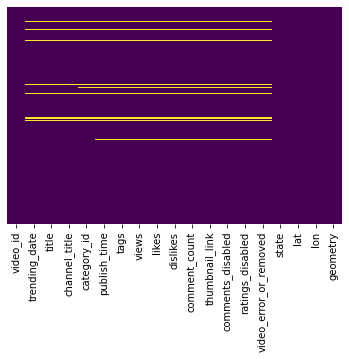

In [16]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
data[data.isnull().any(axis=1)]

video_id  \
116    \nசசிகலா மூலம் போயஸ்கார்டனுக்குள் போய் அதிகாரம...   
117    \nஇளவரசியின் மகன் விவேக் தலையெடுத்து இரண்டு ஆண...   
118                                                   \n   
119    \n Ilavarasi's son Vivek is facing a severe cr...   
120    \n\nOneindia Tamil\nSubscribe for More Videos....   
...                                                  ...   
38255                Visit WWE.com: http://goo.gl/akf0J4   
38256  Must-See WWE videos on YouTube: https://goo.gl...   
38480  Subscribe to WWE on YouTube: http://bit.ly/1i6...   
38481                Visit WWE.com: http://goo.gl/akf0J4   
38482  Must-See WWE videos on YouTube: https://goo.gl...   

                                           trending_date  \
116                                             மகாதேவன்   
117     அவர் சேர்த்து வைத்த பணமே கண்டமாகி விட்டது.சசி...   
118                                                  NaN   
119                                                  NaN   
120                                              Support   
...                                                  ...   
38255                                                NaN   
38256                                                NaN   
38480                                                NaN   
38481                                                NaN   
38482                                                NaN   

                                                   title  channel_title  \
116                                     டி.டி.வி.தினகரன்       பாஸ்கரன்   
117     ஜெயலலிதாவின் ஹைதராபாத் திராட்சைத் தோட்டத்தைக்...   தனது மகள்கள்   
118                                                  NaN            NaN   
119                                                  NaN            NaN   
120     Subscribe▬▬▬▬▬▬▬▬▬\n♥ subscribe :https://www....            NaN   
...                                                  ...            ...   
38255                                                NaN            NaN   
38256                                                NaN            NaN   
38480                                                NaN            NaN   
38481                                                NaN            NaN   
38482                                                NaN            NaN   

                                             category_id  \
116                                             சுதாகரன்   
117    மகனோடு போயஸ்தோட்டத்தில் தஞ்சமடைந்தார் இளவரசி. ...   
118                                                  NaN   
119                                                  NaN   
120                                                  NaN   
...                                                  ...   
38255                                                NaN   
38256                                                NaN   
38480                                                NaN   
38481                                                NaN   
38482                                                NaN   

                                            publish_time  \
116                                             ராஜராஜன்   
117     புனேயில் எம்பிஏ முடித்து விட்டு பெங்களூருவில்...   
118                                                  NaN   
119                                                  NaN   
120                                                  NaN   
...                                                  ...   
38255                                                NaN   
38256                                                NaN   
38480                                                NaN   
38481                                                NaN   
38482                                                NaN   

                                        tags  \
116                            குலோத்துங்கன்   
117     2014ஆம் ஆண்டு அங்கிருந்து விலகினார்.   
118                                      NaN   
119                                      NaN   
120                    

### Limpieza de datos repetidos

In [18]:
#Visualizacion de registros duplicados
data[data.duplicated(
    subset=["video_id","title","channel_title","trending_date","publish_time","views","likes"],
    keep=False)].sort_values(by=["video_id","title","channel_title","trending_date","publish_time","views","likes"])

video_id trending_date  \
38191   #NAME?      18.13.06   
38314   #NAME?      18.13.06   
38372   #NAME?      18.14.06   
38497   #NAME?      18.14.06   
33145   #NAME?      18.16.05   
...        ...           ...   
31737      NaN           NaN   
37925      NaN           NaN   
37928      NaN           NaN   
37931      NaN           NaN   
37934      NaN           NaN   

                                                   title   channel_title  \
38191  #DeepthiSunaina Cheema joke chepthe navvali..N...        Star Maa   
38314  #DeepthiSunaina Cheema joke chepthe navvali..N...        Star Maa   
38372  #DeepthiSunaina Cheema joke chepthe navvali..N...        Star Maa   
38497  #DeepthiSunaina Cheema joke chepthe navvali..N...        Star Maa   
33145  2018 Karnataka Election Results With Arnab Gos...  Republic World   
...                                                  ...             ...   
31737                                                NaN             NaN   
37925                                                NaN             NaN   
37928                                                NaN             NaN   
37931                                                NaN             NaN   
37934                                                NaN             NaN   

      category_id              publish_time  \
38191        24.0  2018-06-12T05:44:19.000Z   
38314        24.0  2018-06-12T05:44:19.000Z   
38372        24.0  2018-06-12T05:44:19.000Z   
38497        24.0  2018-06-12T05:44:19.000Z   
33145        25.0  2018-05-15T05:00:27.000Z   
...           ...                       ...   
31737         NaN                       NaN   
37925         NaN                       NaN   
37928         NaN                       NaN   
37931         NaN                       NaN   
37934         NaN                       NaN   

                                                    tags      views   likes  \
38191  comedy|"action"|"entertainment"|"telugu"|"toll...   675923.0  4642.0   
38314  comedy|"action"|"entertainment"|"telugu"|"toll...   675923.0  4642.0   
38372  comedy|"action"|"entertainment"|"telugu"|"toll...  1014376.0  5974.0   
38497  comedy|"action"|"entertainment"|"telugu"|"toll...  1014376.0  5974.0   
33145  karnataka elections 2018|"karnataka elections ...   333692.0  1316.0   
...                                                  ...        ...     ...   
31737                                                NaN        NaN     NaN   
37925                                                NaN        NaN     NaN   
37928                                                NaN        NaN     NaN   
37931                                                NaN        NaN     NaN   
37934                                                NaN        NaN     NaN   

       dislikes  comment_count  \
38191     908.0          920.0   
38314     908.0          920.0   
38372    1414.0         1132.0   
38497    1414.0         1132.0   
33145     408.0          157.0   
...         ...            ...   
31737       NaN            NaN   
37925       NaN            NaN   
37928       NaN            NaN   
37931       NaN            NaN   
37934       NaN            NaN   

                                       thumbnail_link comments_disabled  \
38191  https://i.ytimg.com/vi/-fKW38f_0Hk/default.jpg             FALSO   
38314  https://i.ytimg.com/vi/-fKW38f_0Hk/default.jpg             FALSO   
38372  https://i.ytimg.com/vi/-fKW38f_0Hk/default.jpg             FALSO   
38497  https://i.ytimg.com/vi/-fKW38f_0Hk/default.jpg             FALSO   
33145  https://i.ytimg.com/vi/-jYTsolMGUg/default.jpg             FALSO   
...                                               ...               ...   
31737                                             NaN               NaN   
37925                                             NaN               NaN   
37928                                             NaN               NaN   
37931                              

Se observa que existen varios datos duplicados en el dataset. Se pasará a elminar los datos duplicados y nos quedaremos con el ultimo registro.

#### Eliminación de datos duplicados

In [19]:
data.drop_duplicates(
    subset=["video_id","title","channel_title","trending_date","publish_time","views","likes"],
    keep="last", inplace=True)
    

Se utilizó como criterio para eleminar los datos duplicados por el "video_id", "title", "channel_title" y "publish_time". Esto se debe a que si presenta el mismo ID, mismo título y el mismo nombre del canal y misma hora y fecha de publicación se puede decir con seguridad que se trata del mismo video.

### Estandarización de tipo de datos

In [20]:
import datetime as dt

In [21]:
data['publish_time'] = pd.to_datetime(data['publish_time'],errors="coerce")

In [22]:
data['trending_date'] = pd.to_datetime(data['trending_date'],format="%y.%d.%m",errors="coerce")

In [23]:
#data['comments_disabled'].apply( vf_to_boolean )
data[['ratings_disabled','comments_disabled', 'video_error_or_removed']
] = data[['ratings_disabled','comments_disabled',
  'video_error_or_removed']].applymap(
  lambda x : True if x == 'VERDADERO' else False if x == 'FALSO'
  else np.NaN )

In [24]:
data[['ratings_disabled','comments_disabled', 'video_error_or_removed']] = data[['ratings_disabled','comments_disabled', 'video_error_or_removed']].astype("bool")

In [25]:
data['views'] = pd.to_numeric(data['views'],errors="coerce",downcast='integer')
data['category_id'] = pd.to_numeric(data['category_id'],errors="coerce",downcast='integer')
data[['views','likes','dislikes','comment_count','category_id']] = data[['views','likes','dislikes','comment_count','category_id']].astype('Int64')

In [26]:
categories['id'] = pd.to_numeric(categories['id'],errors="coerce",downcast='integer')
categories['id'] = categories['id'].astype('Int64')

In [27]:
# separar en 2 columnas float: geometry?

In [28]:
categories['snippet.title'] = categories['snippet.title'].astype("category")
categories['snippet.title']

0         Film & Animation
1         Autos & Vehicles
2                    Music
3           Pets & Animals
4                   Sports
5             Short Movies
6          Travel & Events
7                   Gaming
8            Videoblogging
9           People & Blogs
10                  Comedy
11           Entertainment
12         News & Politics
13           Howto & Style
14               Education
15    Science & Technology
16                  Movies
17         Anime/Animation
18        Action/Adventure
19                Classics
20                  Comedy
21             Documentary
22                   Drama
23                  Family
24                 Foreign
25                  Horror
26          Sci-Fi/Fantasy
27                Thriller
28                  Shorts
29                   Shows
30                Trailers
Name: snippet.title, dtype: category
Categories (30, object): ['Action/Adventure', 'Anime/Animation', 'Autos & Vehicles', 'Classics', ..., 'Thriller', 'Trailers', 

### Limpieza de datos NA

In [29]:
#Si el dato faltante es el video_id, entonces, se removerán dichas observaciones.

In [30]:
data.dropna(subset = ["video_id"], axis = 0, inplace = True)

#### Comprobamos datos nulos dentro del dataframe

In [31]:
data[data.isnull().any(axis=1)]

video_id trending_date  \
116    \nசசிகலா மூலம் போயஸ்கார்டனுக்குள் போய் அதிகாரம...           NaT   
117    \nஇளவரசியின் மகன் விவேக் தலையெடுத்து இரண்டு ஆண...           NaT   
119    \n Ilavarasi's son Vivek is facing a severe cr...           NaT   
586    \nഇന്ത്യന്‍ സിനിമാ ആരാധകരെ മുഴുവന്‍ കോരിത്തരിപ...           NaT   
959    \nஜெயலலிதா உயிருடன் இருந்த போது அவருடனேயே இருந...           NaT   
...                                                  ...           ...   
37935                         Current affairs  playlist-           NaT   
37936  https://www.youtube.com/watch?v=ZFy9-nslWQk&li...           NaT   
38480  Subscribe to WWE on YouTube: http://bit.ly/1i6...           NaT   
38481                Visit WWE.com: http://goo.gl/akf0J4           NaT   
38482  Must-See WWE videos on YouTube: https://goo.gl...           NaT   

                                                   title  \
116                                     டி.டி.வி.தினகரன்   
117     ஜெயலலிதாவின் ஹைதராபாத் திராட்சைத் தோட்டத்தைக்...   
119                                                  NaN   
586                                              Support   
959                                        கிருஷ்ணப்ரியா   
...                                                  ...   
37935                                                NaN   
37936                                                NaN   
38480                                                NaN   
38481                                                NaN   
38482                                                NaN   

                                           channel_title  category_id  \
116                                             பாஸ்கரன்         <NA>   
117                                         தனது மகள்கள்         <NA>   
119                                                  NaN         <NA>   
586     Subscribe▬▬▬▬▬▬▬▬▬\n♥ subscribe : https://goo...         <NA>   
959     விவேக் 3 பேருமே போயஸ் கார்டனில் வளர்ந்தவர்கள்...         <NA>   
...                                                  ...          ...   
37935                                                NaN         <NA>   
37936                                                NaN         <NA>   
38480                                                NaN         <NA>   
38481                                                NaN         <NA>   
38482                                                NaN         <NA>   

      publish_time                                   tags  views  likes  \
116            NaT                          குலோத்துங்கன்   <NA>   <NA>   
117            NaT   2014ஆம் ஆண்டு அங்கிருந்து விலகினார்.   <NA>   <NA>   
119            NaT                                    NaN   <NA>   <NA>   
586            NaT                                    NaN   <NA>   <NA>   
959            NaT                                    NaN   <NA>   <NA>   
...            ...                                    ...    ...    ...   
37935          NaT                                    NaN   <NA>   <NA>   
37936          NaT                                    NaN   <NA>   <NA>   
38480          NaT                                    NaN   <NA>   <NA>   
38481          NaT                                    NaN   <NA>   <NA>   
38482          NaT                                    NaN   <NA>   <NA>   

       dislikes  comment_count thumbnail_link  comments_disabled  \
116        <NA>           <NA>            NaN               True   
117        <NA>           <NA>            NaN               True   
119        <NA>           <NA>            NaN               True   
586        <NA>           <NA>            NaN               True   
959        <NA>           <NA>            NaN               True   
...         ...            ...            ...                ...   
37935      <NA>           <NA>            NaN               True   
37936      <NA>           <NA>            NaN               True   
38480      <NA>           <NA>            NaN   

In [32]:
data[data.isnull().any(axis=1)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 116 to 38482
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                231 non-null    object             
 1   trending_date           0 non-null      datetime64[ns]     
 2   title                   72 non-null     object             
 3   channel_title           35 non-null     object             
 4   category_id             0 non-null      Int64              
 5   publish_time            0 non-null      datetime64[ns, UTC]
 6   tags                    8 non-null      object             
 7   views                   0 non-null      Int64              
 8   likes                   0 non-null      Int64              
 9   dislikes                0 non-null      Int64              
 10  comment_count           0 non-null      Int64              
 11  thumbnail_link          0 non-null      o

Por ultimo eliminamos los datos que tengan NA en "publish_time" y "trending_date"

In [33]:
data.dropna(subset=["publish_time","trending_date"],inplace=True)

In [34]:
data[data.isnull().any(axis=1)]

Empty DataFrame
Columns: [video_id, trending_date, title, channel_title, category_id, publish_time, tags, views, likes, dislikes, comment_count, thumbnail_link, comments_disabled, ratings_disabled, video_error_or_removed, state, lat, lon, geometry]
Index: []

### Datos procesados

In [35]:
data.head()

video_id trending_date  \
0  kzwfHumJyYc    2017-11-14   
1  zUZ1z7FwLc8    2017-11-14   
2  10L1hZ9qa58    2017-11-14   
3  N1vE8iiEg64    2017-11-14   
4  kJzGH0PVQHQ    2017-11-14   

                                               title    channel_title  \
0  Sharry Mann: Cute Munda ( Song Teaser) | Parmi...  Lokdhun Punjabi   
1  पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...          HJ NEWS   
2  Stylish Star Allu Arjun @ ChaySam Wedding Rece...             TFPC   
3                     Eruma Saani | Tamil vs English      Eruma Saani   
4  why Samantha became EMOTIONAL @ Samantha naga ...       Filmylooks   

   category_id              publish_time  \
0            1 2017-11-12 12:20:39+00:00   
1           25 2017-11-13 05:43:56+00:00   
2           24 2017-11-12 15:48:08+00:00   
3           23 2017-11-12 07:08:48+00:00   
4           24 2017-11-13 01:14:16+00:00   

                                                tags    views  likes  \
0  sharry mann|"sharry mann new song"|"sharry man...  1096327  33966   
1  पीरियड्स के समय|"पेट पर पति करता ऐसा"|"देखकर द...   590101    735   
2  Stylish Star Allu Arjun @ ChaySam Wedding Rece...   473988   2011   
3  Eruma Saani|"Tamil Comedy Videos"|"Films"|"Mov...  1242680  70353   
4  Filmylooks|"latest news"|"telugu movies"|"telu...   464015    492   

   dislikes  comment_count                                  thumbnail_link  \
0       798            882  https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg   
1       904              0  https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg   
2       243            149  https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg   
3      1624           2684  https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg   
4       293             66  https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1               True             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                    state        lat        lon  \
0       Arunachal Pradesh  27.100399  93.616601   
1       Arunachal Pradesh  27.100399  93.616601   
2  Dadra And Nagar Haveli  20.266578  73.016618   
3                Nagaland  25.666998  94.116570   
4        Himachal Pradesh  31.100025  77.166597   

                                geometry  
0        POINT (93.61660071 27.10039878)  
1        POINT (93.61660071 27.10039878)  
2  POINT (73.01661780000001 20.26657819)  
3         POINT (94.11657019 25.6669979)  
4        POINT (77.16659704 31.10002545)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33106 entries, 0 to 38532
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                33106 non-null  object             
 1   trending_date           33106 non-null  datetime64[ns]     
 2   title                   33106 non-null  object             
 3   channel_title           33106 non-null  object             
 4   category_id             33106 non-null  Int64              
 5   publish_time            33106 non-null  datetime64[ns, UTC]
 6   tags                    33106 non-null  object             
 7   views                   33106 non-null  Int64              
 8   likes                   33106 non-null  Int64              
 9   dislikes                33106 non-null  Int64              
 10  comment_count           33106 non-null  Int64              
 11  thumbnail_link          33106 non-null  o

In [37]:
data.describe()

category_id         views         likes      dislikes  comment_count  \
count  33106.000000  3.310600e+04  3.310600e+04  3.310600e+04   33106.000000   
mean      21.630762  9.936712e+05  2.550963e+04  1.571959e+03    2518.346433   
std        6.491663  3.140401e+06  9.626428e+04  1.688946e+04   14760.556050   
min        1.000000  4.024000e+03  0.000000e+00  0.000000e+00       0.000000   
25%       23.000000  1.125612e+05  7.860000e+02  9.700000e+01      72.000000   
50%       24.000000  2.745020e+05  2.751000e+03  2.890000e+02     297.000000   
75%       24.000000  7.307798e+05  1.199475e+04  9.300000e+02    1165.750000   
max       43.000000  1.254322e+08  2.912710e+06  1.545017e+06  827755.000000   

                lat           lon  
count  33106.000000  33106.000000  
mean      22.671406     82.113516  
std        6.819211      7.448237  
min        8.900373     72.636867  
25%       19.250232     76.569993  
50%       23.835404     78.570026  
75%       27.333330     88.616647  
max       34.299959     94.216667

In [38]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   kind                31 non-null     object  
 1   etag                31 non-null     object  
 2   id                  31 non-null     Int64   
 3   snippet.channelId   31 non-null     object  
 4   snippet.title       31 non-null     category
 5   snippet.assignable  31 non-null     bool    
dtypes: Int64(1), bool(1), category(1), object(3)
memory usage: 2.5+ KB


In [76]:
%store data
%store categories

Stored 'data' (DataFrame)
Stored 'categories' (DataFrame)


### Requerimientos

#### Por Categoría de Videos

In [39]:
data[['views','likes','dislikes','comment_count']] = data[['views','likes','dislikes','comment_count']].astype(int)

In [40]:
data.columns.values

array(['video_id', 'trending_date', 'title', 'channel_title',
       'category_id', 'publish_time', 'tags', 'views', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed', 'state', 'lat',
       'lon', 'geometry'], dtype=object)

In [41]:
data_cat = data.join(categories.set_index('id'), on='category_id')
data_cat.head()

video_id trending_date  \
0  kzwfHumJyYc    2017-11-14   
1  zUZ1z7FwLc8    2017-11-14   
2  10L1hZ9qa58    2017-11-14   
3  N1vE8iiEg64    2017-11-14   
4  kJzGH0PVQHQ    2017-11-14   

                                               title    channel_title  \
0  Sharry Mann: Cute Munda ( Song Teaser) | Parmi...  Lokdhun Punjabi   
1  पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...          HJ NEWS   
2  Stylish Star Allu Arjun @ ChaySam Wedding Rece...             TFPC   
3                     Eruma Saani | Tamil vs English      Eruma Saani   
4  why Samantha became EMOTIONAL @ Samantha naga ...       Filmylooks   

  category_id              publish_time  \
0           1 2017-11-12 12:20:39+00:00   
1          25 2017-11-13 05:43:56+00:00   
2          24 2017-11-12 15:48:08+00:00   
3          23 2017-11-12 07:08:48+00:00   
4          24 2017-11-13 01:14:16+00:00   

                                                tags    views  likes  \
0  sharry mann|"sharry mann new song"|"sharry man...  1096327  33966   
1  पीरियड्स के समय|"पेट पर पति करता ऐसा"|"देखकर द...   590101    735   
2  Stylish Star Allu Arjun @ ChaySam Wedding Rece...   473988   2011   
3  Eruma Saani|"Tamil Comedy Videos"|"Films"|"Mov...  1242680  70353   
4  Filmylooks|"latest news"|"telugu movies"|"telu...   464015    492   

   dislikes  ...  video_error_or_removed                   state        lat  \
0       798  ...                   False       Arunachal Pradesh  27.100399   
1       904  ...                   False       Arunachal Pradesh  27.100399   
2       243  ...                   False  Dadra And Nagar Haveli  20.266578   
3      1624  ...                   False                Nagaland  25.666998   
4       293  ...                   False        Himachal Pradesh  31.100025   

         lon                               geometry                   kind  \
0  93.616601        POINT (93.61660071 27.10039878)  youtube#videoCategory   
1  93.616601        POINT (93.61660071 27.10039878)  youtube#videoCategory   
2  73.016618  POINT (73.01661780000001 20.26657819)  youtube#videoCategory   
3  94.116570         POINT (94.11657019 25.6669979)  youtube#videoCategory   
4  77.166597        POINT (77.16659704 31.10002545)  youtube#videoCategory   

                                                etag  \
0  "XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKm...   
1  "XI7nbFXulYBIpL0ayR_gDh3eu1k/QiLK0ZIrFoORdk_g2...   
2  "XI7nbFXulYBIpL0ayR_gDh3eu1k/UVB9oxX2Bvqa_w_y3...   
3  "XI7nbFXulYBIpL0ayR_gDh3eu1k/G9LHzQmx44rX2S5ya...   
4  "XI7nbFXulYBIpL0ayR_gDh3eu1k/UVB9oxX2Bvqa_w_y3...   

          snippet.channelId     snippet.title snippet.assignable  
0  UCBR8-60-B28hp2BmDPdntcQ  Film & Animation               True  
1  UCBR8-60-B28hp2BmDPdntcQ   News & Politics               True  
2  UCBR8-60-B28hp2BmDPdntcQ     Entertainment               True  
3  UCBR8-60-B28hp2BmDPdntcQ            Comedy               True  
4  UCBR8-60-B28hp2BmDPdntcQ     Entertainment               True  

[5 rows x 24 columns]

In [42]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33106 entries, 0 to 38532
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                33106 non-null  object             
 1   trending_date           33106 non-null  datetime64[ns]     
 2   title                   33106 non-null  object             
 3   channel_title           33106 non-null  object             
 4   category_id             33106 non-null  object             
 5   publish_time            33106 non-null  datetime64[ns, UTC]
 6   tags                    33106 non-null  object             
 7   views                   33106 non-null  int32              
 8   likes                   33106 non-null  int32              
 9   dislikes                33106 non-null  int32              
 10  comment_count           33106 non-null  int32              
 11  thumbnail_link          33106 non-null  o

In [43]:
print(len(data),len(data_cat))

33106 33106


In [44]:
def showCatsBy(by): #views
  plt.figure(figsize=(16,8))
  plt.xticks(rotation=90)
  catplot = sns.boxplot(x="snippet.title", y=by, data=data_cat, palette='rainbow')
  catplot.set(title= by +' por categoría')

In [45]:
def outliersToMax(cat, since:int, col = 'views'):
  nCat = len(data_cat[data_cat['snippet.title'] == cat])
  nCatOut = len(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>since])
  print( ' Cantidad de datos de entretainment:', nCat, '\n', 'Cantidad de datos outliers:', nCatOut )
  display(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>since])
  print(f'''De {nCat} filas, {nCatOut} son outliers de la categoría entretainment.
    Estos serán ajustados al máximo menor a {since}.''')
  data_cat[col].loc[ (data_cat['snippet.title'] == cat) & (data_cat[col]>since)] = (
    data_cat[data_cat['snippet.title'] == cat ][data_cat[col]<since][col].max() )
  display(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>since])
  

##### 1. ¿Qué categorías de videos son las de mayor tendencia?

##### 2. ¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?

Se utilizó la cantidad de vistas como el indicador de tendencia. Como se observa en el gráfico, las tres primeras categorías con mayor tendencia son: Gaming, Movies y Music, siendo la categoría de Movies la que puede alcanzar puntos muy diferenciados de tendencia.

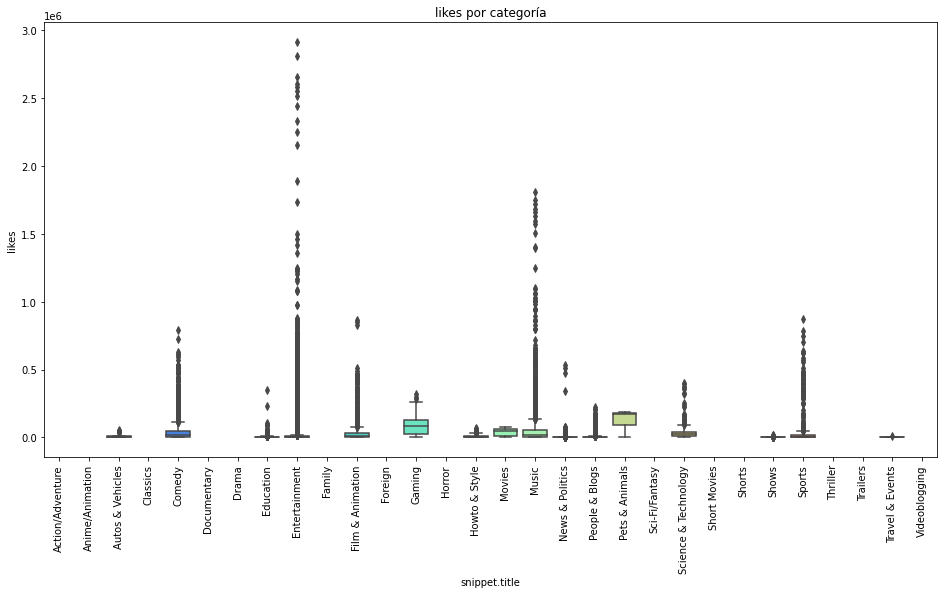

In [51]:
showCatsBy('likes')

In [52]:
outliersToMax('Comedy', 0.7*1e6, 'likes')

 Cantidad de datos de entretainment: 2967 
 Cantidad de datos outliers: 2


C:\Users\GART-03\AppData\Local\Temp\ipykernel_12484\4212360618.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\GART-03\AppData\Local\Temp\ipykernel_12484\4212360618.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



video_id trending_date                               title  \
5402  w4AImq08j9o    2017-12-11  Why I'm not in YouTube Rewind 2017   
5689  w4AImq08j9o    2017-12-12  Why I'm not in YouTube Rewind 2017   

     channel_title category_id              publish_time  \
5402     PewDiePie          23 2017-12-07 17:18:56+00:00   
5689     PewDiePie          23 2017-12-07 17:18:56+00:00   

                                     tags     views   likes  dislikes  ...  \
5402  pewdiepie|"youtube"|"rewind"|"2017"  11468018  721589     18756  ...   
5689  pewdiepie|"youtube"|"rewind"|"2017"  13241801  793330     21961  ...   

      video_error_or_removed        state        lat        lon  \
5402                   False       Kerala   8.900373  76.569993   
5689                   False  West Bengal  22.580390  88.329947   

                             geometry                   kind  \
5402  POINT (76.56999263 8.900372741)  youtube#videoCategory   
5689  POINT (88.32994665 22.58039044)  youtube#videoCategory   

                                                   etag  \
5402  "XI7nbFXulYBIpL0ayR_gDh3eu1k/G9LHzQmx44rX2S5ya...   
5689  "XI7nbFXulYBIpL0ayR_gDh3eu1k/G9LHzQmx44rX2S5ya...   

             snippet.channelId snippet.title snippet.assignable  
5402  UCBR8-60-B28hp2BmDPdntcQ        Comedy               True  
5689  UCBR8-60-B28hp2BmDPdntcQ        Comedy               True  

[2 rows x 24 columns]

De 2967 filas, 2 son outliers de la categoría entretainment.
    Estos serán ajustados al máximo menor a 700000.0.


C:\Users\GART-03\AppData\Local\Temp\ipykernel_12484\4212360618.py:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\GART-03\AppData\Local\Temp\ipykernel_12484\4212360618.py:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Empty DataFrame
Columns: [video_id, trending_date, title, channel_title, category_id, publish_time, tags, views, likes, dislikes, comment_count, thumbnail_link, comments_disabled, ratings_disabled, video_error_or_removed, state, lat, lon, geometry, kind, etag, snippet.channelId, snippet.title, snippet.assignable]
Index: []

[0 rows x 24 columns]

In [53]:
outliersToMax('Education', 0.2*1e6, 'likes') 

C:\Users\GART-03\AppData\Local\Temp\ipykernel_12484\4212360618.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



 Cantidad de datos de entretainment: 1167 
 Cantidad de datos outliers: 2


C:\Users\GART-03\AppData\Local\Temp\ipykernel_12484\4212360618.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



video_id trending_date             title channel_title category_id  \
11351  H34qrTkhFz0    2018-01-12  DO U KNO DA WEI?     PewDiePie          27   
11501  H34qrTkhFz0    2018-01-13  DO U KNO DA WEI?     PewDiePie          27   

                   publish_time  \
11351 2018-01-11 17:41:59+00:00   
11501 2018-01-11 17:41:59+00:00   

                                                    tags    views   likes  \
11351  pewdiepie|"meme"|"review"|"spaghet"|"spaget"|"...  2277099  229608   
11501  pewdiepie|"meme"|"review"|"spaghet"|"spaget"|"...  5217644  352049   

       dislikes  ...  video_error_or_removed      state        lat        lon  \
11351      4376  ...                   False     Sikkim  27.333330  88.616647   
11501      7352  ...                   False  Meghalaya  25.570492  91.880014   

                                    geometry                   kind  \
11351          POINT (88.6166475 27.3333303)  youtube#videoCategory   
11501  POINT (91.88001420000001 25.57049217)  youtube#videoCategory   

                                                    etag  \
11351  "XI7nbFXulYBIpL0ayR_gDh3eu1k/EoYkczo9I3RCf96Rv...   
11501  "XI7nbFXulYBIpL0ayR_gDh3eu1k/EoYkczo9I3RCf96Rv...   

              snippet.channelId snippet.title snippet.assignable  
11351  UCBR8-60-B28hp2BmDPdntcQ     Education               True  
11501  UCBR8-60-B28hp2BmDPdntcQ     Education               True  

[2 rows x 24 columns]

De 1167 filas, 2 son outliers de la categoría entretainment.
    Estos serán ajustados al máximo menor a 200000.0.


C:\Users\GART-03\AppData\Local\Temp\ipykernel_12484\4212360618.py:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\GART-03\AppData\Local\Temp\ipykernel_12484\4212360618.py:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Empty DataFrame
Columns: [video_id, trending_date, title, channel_title, category_id, publish_time, tags, views, likes, dislikes, comment_count, thumbnail_link, comments_disabled, ratings_disabled, video_error_or_removed, state, lat, lon, geometry, kind, etag, snippet.channelId, snippet.title, snippet.assignable]
Index: []

[0 rows x 24 columns]

In [54]:
outliersToMax('Entertainment', 1*1e6, 'likes')

 Cantidad de datos de entretainment: 14766 
 Cantidad de datos outliers: 28


C:\Users\GART-03\AppData\Local\Temp\ipykernel_12484\4212360618.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\GART-03\AppData\Local\Temp\ipykernel_12484\4212360618.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



video_id trending_date  \
3191   6ZfuNTqbHE8    2017-11-30   
3387   6ZfuNTqbHE8    2017-12-01   
3597   6ZfuNTqbHE8    2017-12-02   
3790   6ZfuNTqbHE8    2017-12-03   
3988   6ZfuNTqbHE8    2017-12-04   
4192   6ZfuNTqbHE8    2017-12-05   
4421   6ZfuNTqbHE8    2017-12-06   
4667   FlsCjmMhFmw    2017-12-07   
4688   6ZfuNTqbHE8    2017-12-07   
4782   FlsCjmMhFmw    2017-12-08   
4968   FlsCjmMhFmw    2017-12-09   
5163   FlsCjmMhFmw    2017-12-10   
5348   FlsCjmMhFmw    2017-12-11   
5646   FlsCjmMhFmw    2017-12-12   
23231  QwievZ1Tx-8    2018-03-18   
23429  QwievZ1Tx-8    2018-03-19   
23639  QwievZ1Tx-8    2018-03-20   
23696  QwievZ1Tx-8    2018-03-21   
24018  QwievZ1Tx-8    2018-03-22   
27062  T9WN2_ikz6Q    2018-04-14   
27313  T9WN2_ikz6Q    2018-04-15   
29474  u9Mv98Gr5pY    2018-04-26   
29669  u9Mv98Gr5pY    2018-04-27   
29869  u9Mv98Gr5pY    2018-04-28   
29942  u9Mv98Gr5pY    2018-04-29   
30082  u9Mv98Gr5pY    2018-04-29   
30182  u9Mv98Gr5pY    2018-04-30   
30397  u9Mv98Gr5pY    2018-05-01   

                                                   title  \
3191   Marvel Studios' Avengers: Infinity War Officia...   
3387   Marvel Studios' Avengers: Infinity War Officia...   
3597   Marvel Studios' Avengers: Infinity War Officia...   
3790   Marvel Studios' Avengers: Infinity War Officia...   
3988   Marvel Studios' Avengers: Infinity War Officia...   
4192   Marvel Studios' Avengers: Infinity War Officia...   
4421   Marvel Studios' Avengers: Infinity War Officia...   
4667   YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
4688   Marvel Studios' Avengers: Infinity War Officia...   
4782   YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
4968   YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
5163   YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
5348   YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
5646   YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
23231  Marvel Studios' Avengers: Infinity War - Offic...   
23429  Marvel Studios' Avengers: Infinity War - Offic...   
23639  Marvel Studios' Avengers: Infinity War - Offic...   
23696  Marvel Studios' Avengers: Infinity War - Offic...   
24018  Marvel Studios' Avengers: Infinity War - Offic...   
27062                     BB Ki Vines- | The Sacrifice |   
27313                     BB Ki Vines- | The Sacrifice |   
29474                      VENOM - Official Trailer (HD)   
29669                      VENOM - Official Trailer (HD)   
29869                      VENOM - Official Trailer (HD)   
29942                      VENOM - Official Trailer (HD)   
30082                      VENOM - Official Trailer (HD)   
30182                      VENOM - Official Trailer (HD)   
30397                      VENOM - Official Trailer (HD)   

                     channel_title category_id              publish_time  \
3191          Marvel Entertainment          24 2017-11-29 13:26:24+00:00   
3387          Marvel Entertainment          24 2017-11-29 13:26:24+00:00   
3597          Marvel Entertainment          24 2017-11-29 13:26:24+00:00   
3790          Marvel Entertainment          24 2017-11-29 13:26:24+00:00   
3988          Marvel Entertainment          24 2017-11-29 13:26:24+00:00   
4192          Marvel Entertainment          24 2017-11-29 13:26:24+00:00   
4421          Marvel Entertainment          24 2017-11-29 13:26:24+00:00   
4667             YouTube Spotlight          24 2017-12-06 17:58:51+00:00   
4688          Marvel Entertainment          24 2017-11-29 13:26:24+00:00   
4782             YouTube Spotlight          24 2017-12-06 17:58:51+00:00   
4968             YouTube Spotlight          24 2017-12-06 17:58:51+00:00   
5163             YouTube Spotlight          24 2017-12-06 17:58:51+00:00   
5348             YouTube Spotlight          24 2017-12-06 17:58:51+00:00   
5646             YouTube Spotlight          24 2017-12-06 17:58:51+00:00   
23231         Marvel Entertainment          24 2018-03-16 13:02:41+00:00   
23429   

De 14766 filas, 28 son outliers de la categoría entretainment.
    Estos serán ajustados al máximo menor a 1000000.0.


C:\Users\GART-03\AppData\Local\Temp\ipykernel_12484\4212360618.py:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\GART-03\AppData\Local\Temp\ipykernel_12484\4212360618.py:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Empty DataFrame
Columns: [video_id, trending_date, title, channel_title, category_id, publish_time, tags, views, likes, dislikes, comment_count, thumbnail_link, comments_disabled, ratings_disabled, video_error_or_removed, state, lat, lon, geometry, kind, etag, snippet.channelId, snippet.title, snippet.assignable]
Index: []

[0 rows x 24 columns]

In [55]:
outliersToMax('Film & Animation', 0.55*1e6, 'likes') 

C:\Users\GART-03\AppData\Local\Temp\ipykernel_12484\4212360618.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



 Cantidad de datos de entretainment: 1463 
 Cantidad de datos outliers: 3


C:\Users\GART-03\AppData\Local\Temp\ipykernel_12484\4212360618.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



video_id trending_date  \
17   ePO5M5DE01I    2017-11-14   
271  ePO5M5DE01I    2017-11-15   
560  ePO5M5DE01I    2017-11-16   

                                                 title channel_title  \
17   Tiger Zinda Hai | Official Trailer | Salman Kh...           YRF   
271  Tiger Zinda Hai | Official Trailer | Salman Kh...           YRF   
560  Tiger Zinda Hai | Official Trailer | Salman Kh...           YRF   

    category_id              publish_time  \
17            1 2017-11-07 06:01:50+00:00   
271           1 2017-11-07 06:01:50+00:00   
560           1 2017-11-07 06:01:50+00:00   

                                                  tags     views   likes  \
17   Tiger Zinda Hai Trailer|"Tiger Zinda Hai Offic...  35885754  829362   
271  Tiger Zinda Hai Trailer|"Tiger Zinda Hai Offic...  37533416  853550   
560  Tiger Zinda Hai Trailer|"Tiger Zinda Hai Offic...  38664360  865914   

     dislikes  ...  video_error_or_removed      state        lat        lon  \
17      61195  ...                   False  Karnataka  12.570381  76.919997   
271     62858  ...                   False     Orissa  19.820430  85.900017   
560     63908  ...                   False    Haryana  28.450006  77.019991   

                            geometry                   kind  \
17   POINT (76.91999711 12.57038129)  youtube#videoCategory   
271  POINT (85.90001746 19.82042971)  youtube#videoCategory   
560  POINT (77.01999101 28.45000633)  youtube#videoCategory   

                                                  etag  \
17   "XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKm...   
271  "XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKm...   
560  "XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKm...   

            snippet.channelId     snippet.title snippet.assignable  
17   UCBR8-60-B28hp2BmDPdntcQ  Film & Animation               True  
271  UCBR8-60-B28hp2BmDPdntcQ  Film & Animation               True  
560  UCBR8-60-B28hp2BmDPdntcQ  Film & Animation               True  

[3 rows x 24 columns]

De 1463 filas, 3 son outliers de la categoría entretainment.
    Estos serán ajustados al máximo menor a 550000.0.


C:\Users\GART-03\AppData\Local\Temp\ipykernel_12484\4212360618.py:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\GART-03\AppData\Local\Temp\ipykernel_12484\4212360618.py:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Empty DataFrame
Columns: [video_id, trending_date, title, channel_title, category_id, publish_time, tags, views, likes, dislikes, comment_count, thumbnail_link, comments_disabled, ratings_disabled, video_error_or_removed, state, lat, lon, geometry, kind, etag, snippet.channelId, snippet.title, snippet.assignable]
Index: []

[0 rows x 24 columns]

In [56]:
outliersToMax('Music', 1.2*1e6, 'likes') 

 Cantidad de datos de entretainment: 3289 
 Cantidad de datos outliers: 12


C:\Users\GART-03\AppData\Local\Temp\ipykernel_12484\4212360618.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\GART-03\AppData\Local\Temp\ipykernel_12484\4212360618.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



video_id trending_date  \
90     2Vv-BfVoq4g    2017-11-14   
388    2Vv-BfVoq4g    2017-11-15   
11580  dfnCAmr569k    2018-01-14   
11787  dfnCAmr569k    2018-01-15   
12001  dfnCAmr569k    2018-01-16   
12256  dfnCAmr569k    2018-01-17   
12532  dfnCAmr569k    2018-01-18   
22410  tCXGJQYZ9JA    2018-03-14   
22646  tCXGJQYZ9JA    2018-03-15   
22716  tCXGJQYZ9JA    2018-03-16   
22934  tCXGJQYZ9JA    2018-03-17   
23203  tCXGJQYZ9JA    2018-03-18   

                                                title    channel_title  \
90        Ed Sheeran - Perfect (Official Music Video)       Ed Sheeran   
388       Ed Sheeran - Perfect (Official Music Video)       Ed Sheeran   
11580  Taylor Swift - End Game ft. Ed Sheeran, Future  TaylorSwiftVEVO   
11787  Taylor Swift - End Game ft. Ed Sheeran, Future  TaylorSwiftVEVO   
12001  Taylor Swift - End Game ft. Ed Sheeran, Future  TaylorSwiftVEVO   
12256  Taylor Swift - End Game ft. Ed Sheeran, Future  TaylorSwiftVEVO   
12532  Taylor Swift - End Game ft. Ed Sheeran, Future  TaylorSwiftVEVO   
22410                         Taylor Swift - Delicate  TaylorSwiftVEVO   
22646                         Taylor Swift - Delicate  TaylorSwiftVEVO   
22716                         Taylor Swift - Delicate  TaylorSwiftVEVO   
22934                         Taylor Swift - Delicate  TaylorSwiftVEVO   
23203                         Taylor Swift - Delicate  TaylorSwiftVEVO   

      category_id              publish_time  \
90             10 2017-11-09 11:04:14+00:00   
388            10 2017-11-09 11:04:14+00:00   
11580          10 2018-01-12 05:00:01+00:00   
11787          10 2018-01-12 05:00:01+00:00   
12001          10 2018-01-12 05:00:01+00:00   
12256          10 2018-01-12 05:00:01+00:00   
12532          10 2018-01-12 05:00:01+00:00   
22410          10 2018-03-12 01:15:10+00:00   
22646          10 2018-03-12 01:15:10+00:00   
22716          10 2018-03-12 01:15:10+00:00   
22934          10 2018-03-12 01:15:10+00:00   
23203          10 2018-03-12 01:15:10+00:00   

                                                    tags     views    likes  \
90     edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634126   
388    edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  39082222  1721384   
11580  Taylor|"Swift"|"End"|"Game"|"Big"|"Machine"|"Pop"  23198594  1404637   
11787  Taylor|"Swift"|"End"|"Game"|"Big"|"Machine"|"Pop"  29743367  1574077   
12001  Taylor|"Swift"|"End"|"Game"|"Big"|"Machine"|"Pop"  34708457  1681448   
12256  Taylor|"Swift"|"End"|"Game"|"Big"|"Machine"|"Pop"  38629167  1752163   
12532  Taylor|"Swift"|"End"|"Game"|"Big"|"Machine"|"Pop"  42019590  1804377   
22410  Taylor Swift|"Delicate"|"Big"|"Machine"|"Recor...  24262331  1249400   
22646  Taylor Swift|"Delicate"|"Big"|"Machine"|"Recor...  29923522  1395751   
22716  Taylor Swift|"Delicate"|"Big"|"Machine"|"Recor...  35218973  1506790   
22934  Taylor Swift|"Delicate"|"Big"|"Machine"|"Recor...  39770100  1592490   
23203  Taylor Swift|"Delicate"|"Big"|"Machine"|"Recor...  43738208  1658756   

       dislikes  ...  video_error_or_removed             state        lat  \
90        21082  ...                   False           Mizoram  23.710399   
388       23137  ...                   False          Nagaland  25.666998   
11580     72532  ...                   False         Jharkhand  23.800393   
11787     84550  ...                   False       West Bengal  22.580390   
12001     91764  ...                   False     Uttar Pradesh  27.599981   
12256     96637  ...                   False         Jharkhand  23.800393   
12532    100033  ...                   False            Orissa  19.820430   
22410     64939  ...                   False       West Bengal  22.580390   
22646     76071  ...                   False             Bihar  25.785414   
22716     84074  ...                   False             Delhi  28.669993   
22934     89677  ...                   False           Mizoram  23.710399   
23203     9404

De 3289 filas, 12 son outliers de la categoría entretainment.
    Estos serán ajustados al máximo menor a 1200000.0.


C:\Users\GART-03\AppData\Local\Temp\ipykernel_12484\4212360618.py:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\GART-03\AppData\Local\Temp\ipykernel_12484\4212360618.py:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Empty DataFrame
Columns: [video_id, trending_date, title, channel_title, category_id, publish_time, tags, views, likes, dislikes, comment_count, thumbnail_link, comments_disabled, ratings_disabled, video_error_or_removed, state, lat, lon, geometry, kind, etag, snippet.channelId, snippet.title, snippet.assignable]
Index: []

[0 rows x 24 columns]

In [57]:
outliersToMax('News & Politics', 0.25*1e6, 'likes') 

 Cantidad de datos de entretainment: 4718 
 Cantidad de datos outliers: 4


C:\Users\GART-03\AppData\Local\Temp\ipykernel_12484\4212360618.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\GART-03\AppData\Local\Temp\ipykernel_12484\4212360618.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



video_id trending_date                            title  \
15763  yzshoDMBkqE    2018-02-04  LOGAN PAUL RETURNS  📰 PEW NEWS📰   
15939  yzshoDMBkqE    2018-02-05  LOGAN PAUL RETURNS  📰 PEW NEWS📰   
16119  yzshoDMBkqE    2018-02-06  LOGAN PAUL RETURNS  📰 PEW NEWS📰   
16338  yzshoDMBkqE    2018-02-07  LOGAN PAUL RETURNS  📰 PEW NEWS📰   

      channel_title category_id              publish_time  \
15763     PewDiePie          25 2018-02-03 19:15:57+00:00   
15939     PewDiePie          25 2018-02-03 19:15:57+00:00   
16119     PewDiePie          25 2018-02-03 19:15:57+00:00   
16338     PewDiePie          25 2018-02-03 19:15:57+00:00   

                         tags    views   likes  dislikes  ...  \
15763  pewdiepie|"pew"|"news"  4132424  338306     10249  ...   
15939  pewdiepie|"pew"|"news"  6975564  475269     17506  ...   
16119  pewdiepie|"pew"|"news"  7906164  510515     19747  ...   
16338  pewdiepie|"pew"|"news"  8476168  530022     21139  ...   

       video_error_or_removed             state        lat        lon  \
15763                   False  Himachal Pradesh  31.100025  77.166597   
15939                   False       Uttaranchal  30.320409  78.050006   
16119                   False       Uttaranchal  30.320409  78.050006   
16338                   False         Jharkhand  23.800393  86.419986   

                              geometry                   kind  \
15763  POINT (77.16659704 31.10002545)  youtube#videoCategory   
15939  POINT (78.05000565 30.32040895)  youtube#videoCategory   
16119  POINT (78.05000565 30.32040895)  youtube#videoCategory   
16338  POINT (86.41998572 23.80039349)  youtube#videoCategory   

                                                    etag  \
15763  "XI7nbFXulYBIpL0ayR_gDh3eu1k/QiLK0ZIrFoORdk_g2...   
15939  "XI7nbFXulYBIpL0ayR_gDh3eu1k/QiLK0ZIrFoORdk_g2...   
16119  "XI7nbFXulYBIpL0ayR_gDh3eu1k/QiLK0ZIrFoORdk_g2...   
16338  "XI7nbFXulYBIpL0ayR_gDh3eu1k/QiLK0ZIrFoORdk_g2...   

              snippet.channelId    snippet.title snippet.assignable  
15763  UCBR8-60-B28hp2BmDPdntcQ  News & Politics               True  
15939  UCBR8-60-B28hp2BmDPdntcQ  News & Politics               True  
16119  UCBR8-60-B28hp2BmDPdntcQ  News & Politics               True  
16338  UCBR8-60-B28hp2BmDPdntcQ  News & Politics               True  

[4 rows x 24 columns]

De 4718 filas, 4 son outliers de la categoría entretainment.
    Estos serán ajustados al máximo menor a 250000.0.


C:\Users\GART-03\AppData\Local\Temp\ipykernel_12484\4212360618.py:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\GART-03\AppData\Local\Temp\ipykernel_12484\4212360618.py:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Empty DataFrame
Columns: [video_id, trending_date, title, channel_title, category_id, publish_time, tags, views, likes, dislikes, comment_count, thumbnail_link, comments_disabled, ratings_disabled, video_error_or_removed, state, lat, lon, geometry, kind, etag, snippet.channelId, snippet.title, snippet.assignable]
Index: []

[0 rows x 24 columns]

In [58]:
outliersToMax('Science & Technology', 1*1e6, 'likes')

 Cantidad de datos de entretainment: 518 
 Cantidad de datos outliers: 0


C:\Users\GART-03\AppData\Local\Temp\ipykernel_12484\4212360618.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\GART-03\AppData\Local\Temp\ipykernel_12484\4212360618.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Empty DataFrame
Columns: [video_id, trending_date, title, channel_title, category_id, publish_time, tags, views, likes, dislikes, comment_count, thumbnail_link, comments_disabled, ratings_disabled, video_error_or_removed, state, lat, lon, geometry, kind, etag, snippet.channelId, snippet.title, snippet.assignable]
Index: []

[0 rows x 24 columns]

De 518 filas, 0 son outliers de la categoría entretainment.
    Estos serán ajustados al máximo menor a 1000000.0.


C:\Users\GART-03\AppData\Local\Temp\ipykernel_12484\4212360618.py:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\GART-03\AppData\Local\Temp\ipykernel_12484\4212360618.py:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Empty DataFrame
Columns: [video_id, trending_date, title, channel_title, category_id, publish_time, tags, views, likes, dislikes, comment_count, thumbnail_link, comments_disabled, ratings_disabled, video_error_or_removed, state, lat, lon, geometry, kind, etag, snippet.channelId, snippet.title, snippet.assignable]
Index: []

[0 rows x 24 columns]

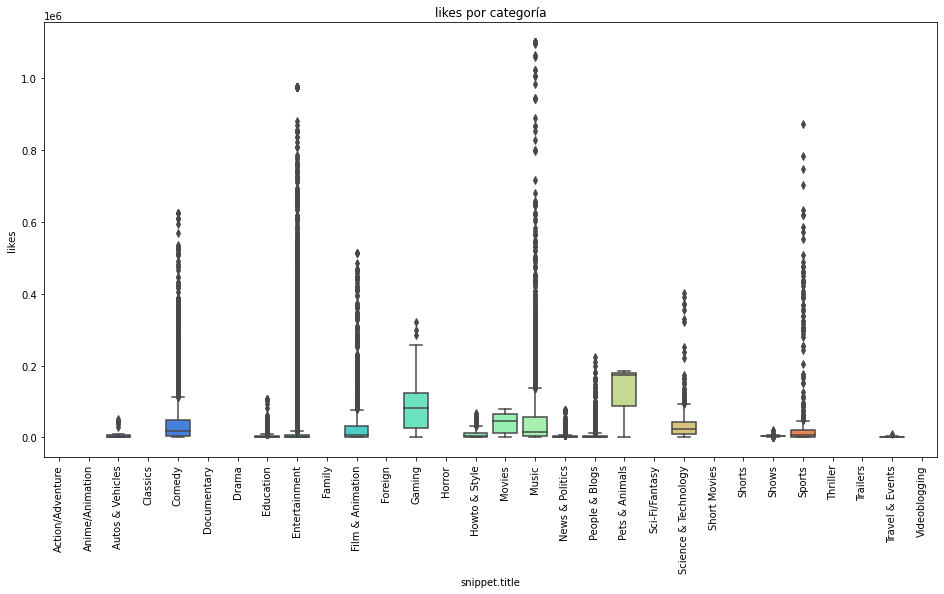

In [59]:
showCatsBy('likes')

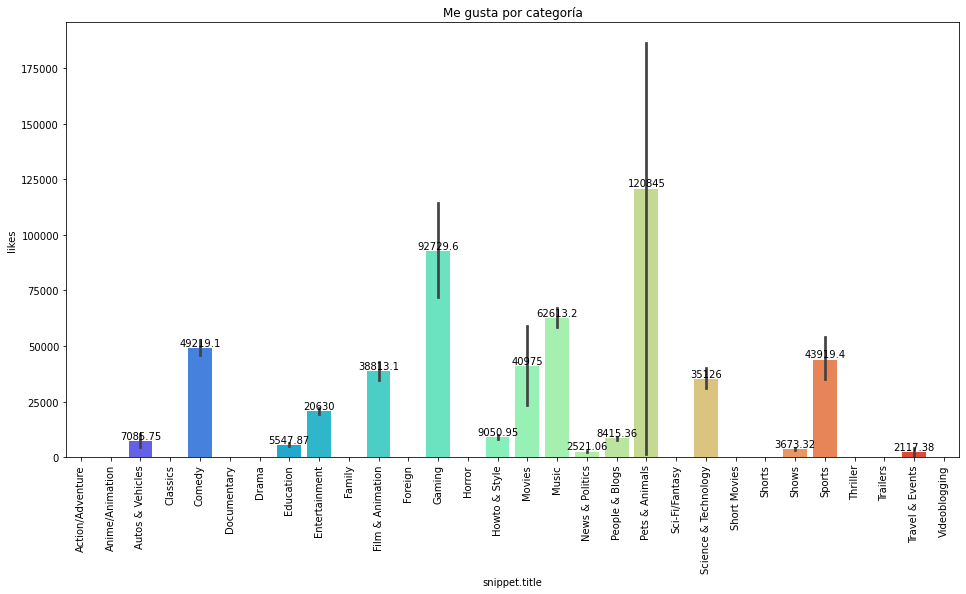

In [60]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
_lpc = sns.barplot(x="snippet.title", y="likes", data=data_cat, palette='rainbow')
_lpc.set(title='Me gusta por categoría')
for i in _lpc.containers: _lpc.bar_label(i,)

Las categorías con mayor cantidad de likes son Pets & Animals y Gaming.

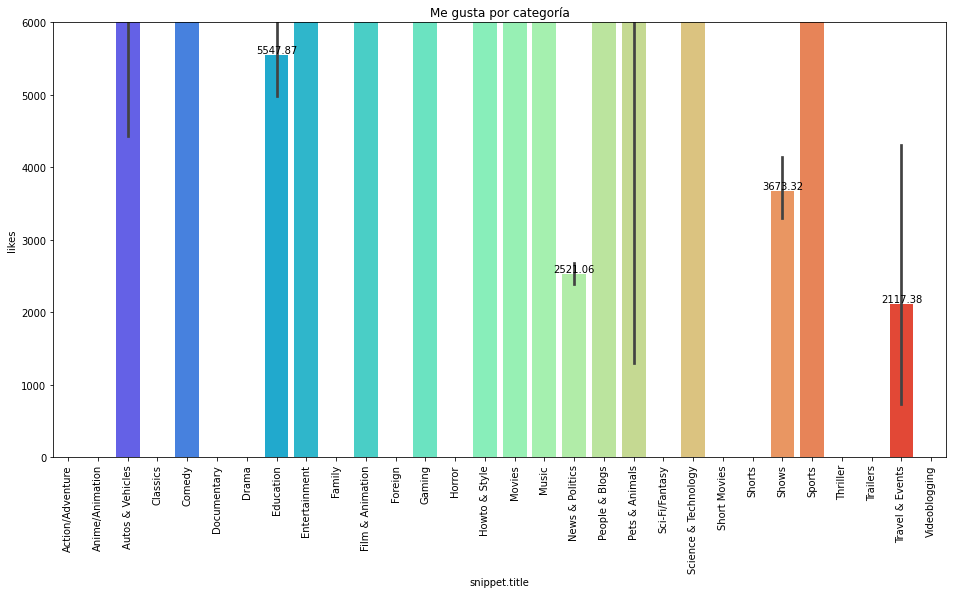

In [61]:
#plot.ylim([0, 6000])
_lpc.set(ylim=(0, 6000))
_lpc.figure

Las categorías con menor cantidad de likes, sin considerar aquellas categorías con nula cantidad de likes, son Travels & Events, News & Politics y Shows.

##### 3. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Me gusta” / “No me gusta”?

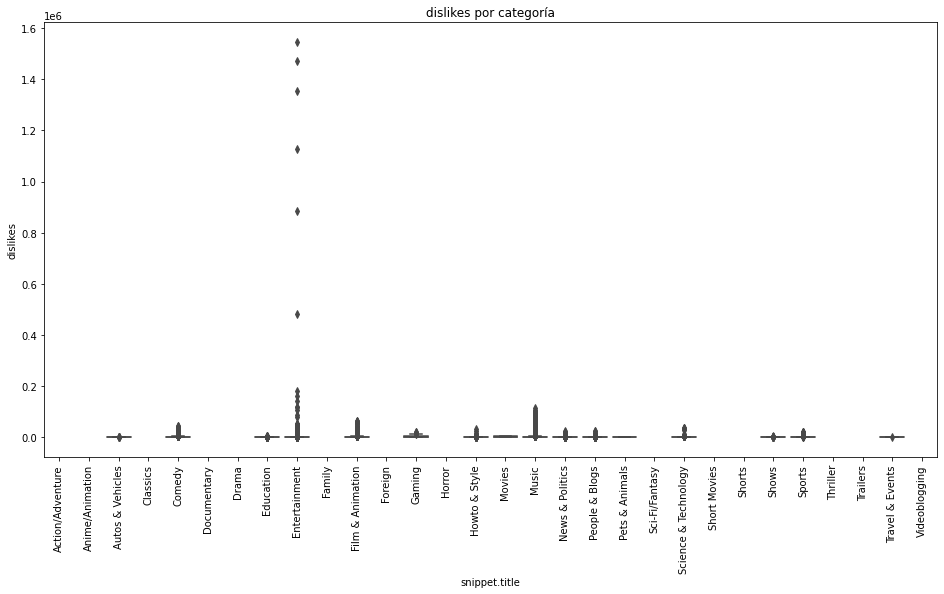

In [62]:
showCatsBy('dislikes')

In [63]:
outliersToMax('Entertainment', 0.2*1e6, 'dislikes')

 Cantidad de datos de entretainment: 14766 
 Cantidad de datos outliers: 6


C:\Users\GART-03\AppData\Local\Temp\ipykernel_12484\4212360618.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\GART-03\AppData\Local\Temp\ipykernel_12484\4212360618.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



video_id trending_date  \
4667  FlsCjmMhFmw    2017-12-07   
4782  FlsCjmMhFmw    2017-12-08   
4968  FlsCjmMhFmw    2017-12-09   
5163  FlsCjmMhFmw    2017-12-10   
5348  FlsCjmMhFmw    2017-12-11   
5646  FlsCjmMhFmw    2017-12-12   

                                                  title      channel_title  \
4667  YouTube Rewind: The Shape of 2017 | #YouTubeRe...  YouTube Spotlight   
4782  YouTube Rewind: The Shape of 2017 | #YouTubeRe...  YouTube Spotlight   
4968  YouTube Rewind: The Shape of 2017 | #YouTubeRe...  YouTube Spotlight   
5163  YouTube Rewind: The Shape of 2017 | #YouTubeRe...  YouTube Spotlight   
5348  YouTube Rewind: The Shape of 2017 | #YouTubeRe...  YouTube Spotlight   
5646  YouTube Rewind: The Shape of 2017 | #YouTubeRe...  YouTube Spotlight   

     category_id              publish_time  \
4667          24 2017-12-06 17:58:51+00:00   
4782          24 2017-12-06 17:58:51+00:00   
4968          24 2017-12-06 17:58:51+00:00   
5163          24 2017-12-06 17:58:51+00:00   
5348          24 2017-12-06 17:58:51+00:00   
5646          24 2017-12-06 17:58:51+00:00   

                                                   tags     views   likes  \
4667  Rewind|"Rewind 2017"|"youtube rewind 2017"|"#Y...  24784863  975738   
4782  Rewind|"Rewind 2017"|"youtube rewind 2017"|"#Y...  52611730  975738   
4968  Rewind|"Rewind 2017"|"youtube rewind 2017"|"#Y...  56367282  975738   
5163  Rewind|"Rewind 2017"|"youtube rewind 2017"|"#Y...  56367282  975738   
5348  Rewind|"Rewind 2017"|"youtube rewind 2017"|"#Y...  56367282  975738   
5646  Rewind|"Rewind 2017"|"youtube rewind 2017"|"#Y...  56367282  975738   

      dislikes  ...  video_error_or_removed          state        lat  \
4667    483933  ...                   False   Chhattisgarh  22.090420   
4782    884954  ...                   False  Uttar Pradesh  27.599981   
4968   1127805  ...                   False          Bihar  25.785414   
5163   1353650  ...                   False         Kerala   8.900373   
5348   1470387  ...                   False       Nagaland  25.666998   
5646   1545017  ...                   False            Goa  15.491997   

            lon                         geometry                   kind  \
4667  82.159987  POINT (82.15998734 22.09042035)  youtube#videoCategory   
4782  78.050006  POINT (78.05000565 27.59998069)  youtube#videoCategory   
4968  87.479973   POINT (87.4799727 25.78541445)  youtube#videoCategory   
5163  76.569993  POINT (76.56999263 8.900372741)  youtube#videoCategory   
5348  94.116570   POINT (94.11657019 25.6669979)  youtube#videoCategory   
5646  73.818001    POINT (73.81800065 15.491997)  youtube#videoCategory   

                                                   etag  \
4667  "XI7nbFXulYBIpL0ayR_gDh3eu1k/UVB9oxX2Bvqa_w_y3...   
4782  "XI7nbFXulYBIpL0ayR_gDh3eu1k/UVB9oxX2Bvqa_w_y3...   
4968  "XI7nbFXulYBIpL0ayR_gDh3eu1k/UVB9oxX2Bvqa_w_y3...   
5163  "XI7nbFXulYBIpL0ayR_gDh3eu1k/UVB9oxX2Bvqa_w_y3...   
5348  "XI7nbFXulYBIpL0ayR_gDh3eu1k/UVB9oxX2Bvqa_w_y3...   
5646  "XI7nbFXulYBIpL0ayR_gDh3eu1k/UVB9oxX2Bvqa_w_y3...   

             snippet.channelId  snippet.title snippet.assignable  
4667  UCBR8-60-B28hp2BmDPdntcQ  Entertainment               True  
4782  UCBR8-60-B28hp2BmDPdntcQ  Entertainment               True  
4968  UCBR8-60-B28hp2BmDPdntcQ  Entertainment               True  
5163  UCBR8-60-B28hp2BmDPdntcQ  Entertainment               True  
5348  UCBR8-60-B28hp2BmDPdntcQ  Entertainment               True  
5646  UCBR8-60-B28hp2BmDPdntcQ  Entertainment               True  

[6 rows x 24 columns]

De 14766 filas, 6 son outliers de la categoría entretainment.
    Estos serán ajustados al máximo menor a 200000.0.


C:\Users\GART-03\AppData\Local\Temp\ipykernel_12484\4212360618.py:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\GART-03\AppData\Local\Temp\ipykernel_12484\4212360618.py:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Empty DataFrame
Columns: [video_id, trending_date, title, channel_title, category_id, publish_time, tags, views, likes, dislikes, comment_count, thumbnail_link, comments_disabled, ratings_disabled, video_error_or_removed, state, lat, lon, geometry, kind, etag, snippet.channelId, snippet.title, snippet.assignable]
Index: []

[0 rows x 24 columns]

[Text(0.5, 1.0, 'No me gusta por categoría')]

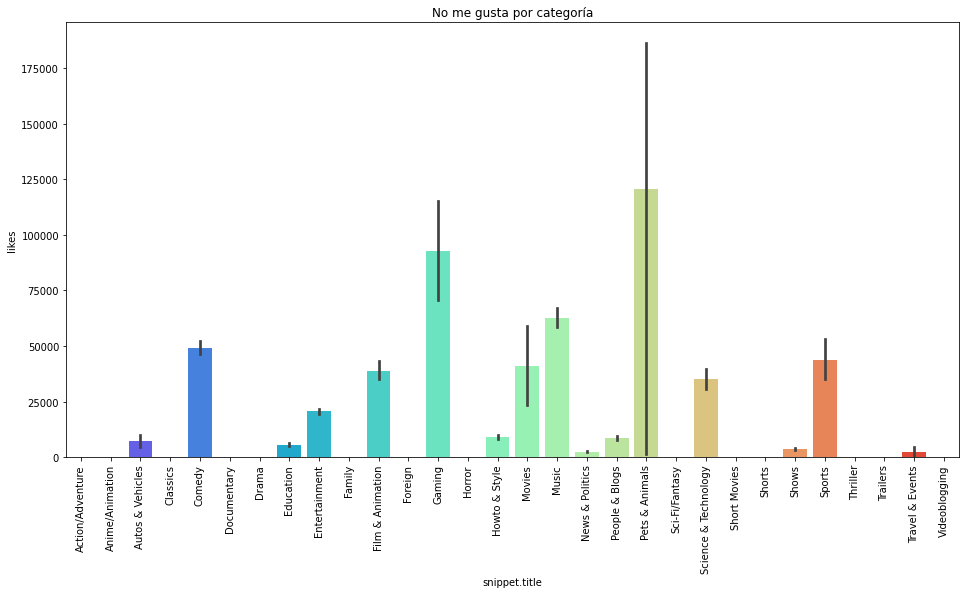

In [64]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
sns.barplot(x="snippet.title", y="likes", data=data_cat, palette='rainbow').set(title='No me gusta por categoría')

In [65]:
data_cat_ld = data_cat[["snippet.title","likes","dislikes"]].melt('snippet.title', var_name='cols', value_name='vals')
data_cat_ld.head()

snippet.title   cols   vals
0  Film & Animation  likes  33966
1   News & Politics  likes    735
2     Entertainment  likes   2011
3            Comedy  likes  70353
4     Entertainment  likes    492

[Text(0.5, 1.0, 'Me gusta y No me gusta por categoría')]

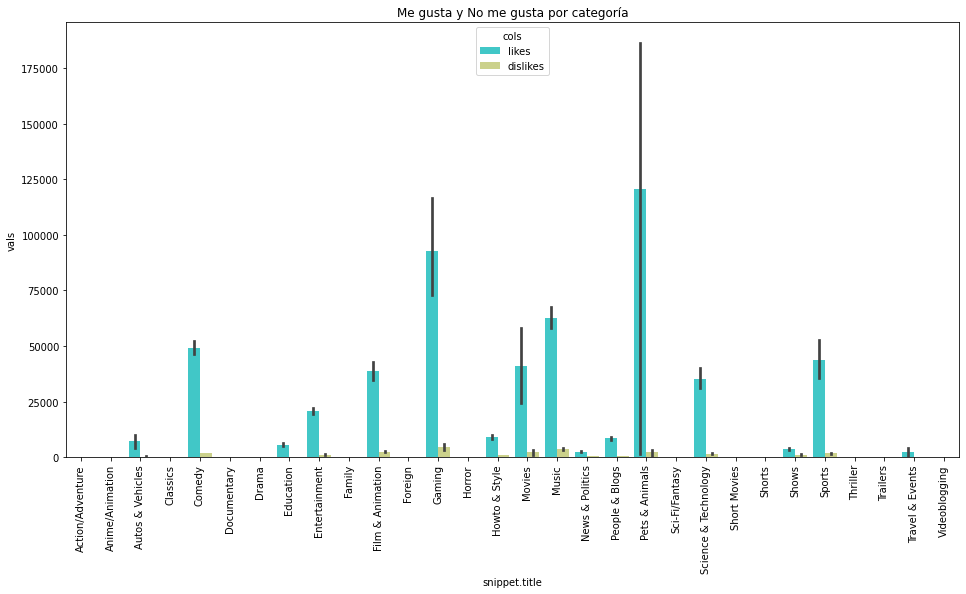

In [66]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
sns.barplot(x="snippet.title", y="vals", hue='cols', data=data_cat_ld, palette='rainbow').set(title='Me gusta y No me gusta por categoría')

In [67]:
data_cat[['snippet.title','likes','dislikes']].iplot(
  kind='bar',barmode='stack', title='Me gusta y No me gusta por Categorías',categories='snippet.title')

In [68]:
dc_ld_ratio = data_cat[['snippet.title','likes','dislikes']]
dc_ld_ratio['ratio'] = data_cat['likes'] / data_cat['dislikes']
dc_ld_ratio

snippet.title  likes  dislikes      ratio
0      Film & Animation  33966       798  42.563910
1       News & Politics    735       904   0.813053
2         Entertainment   2011       243   8.275720
3                Comedy  70353      1624  43.320813
4         Entertainment    492       293   1.679181
...                 ...    ...       ...        ...
38528            Comedy   3291       404   8.146040
38529     Entertainment   1726       478   3.610879
38530     Entertainment   1216       453   2.684327
38531     Entertainment    698       115   6.069565
38532     Entertainment  22466      1609  13.962710

[33106 rows x 4 columns]

c:\Users\GART-03\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning:

invalid value encountered in subtract



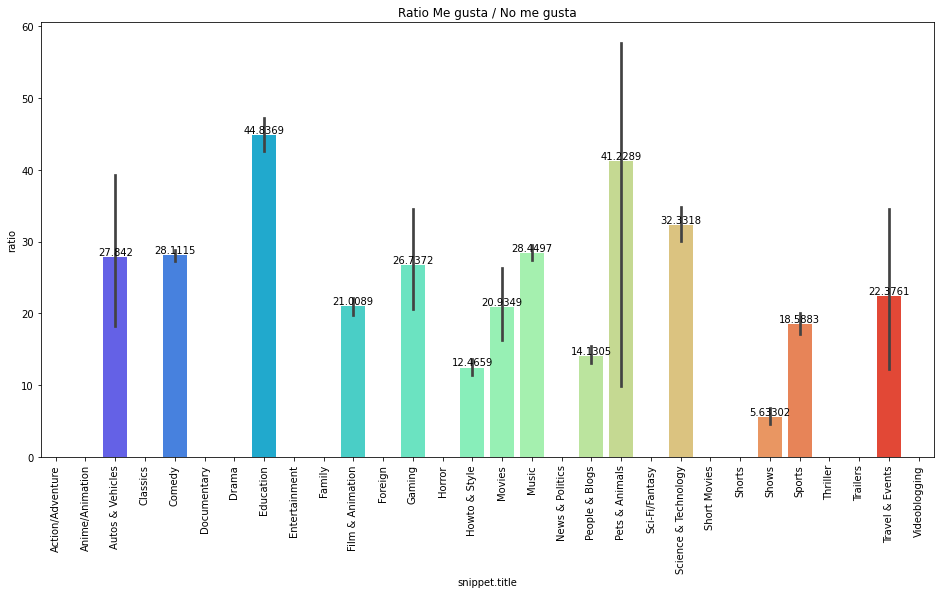

In [69]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
dc_ld_ratio_plot = sns.barplot(x="snippet.title", y="ratio", data=dc_ld_ratio, palette='rainbow')
dc_ld_ratio_plot.set(title='Ratio Me gusta / No me gusta')
for i in dc_ld_ratio_plot.containers: dc_ld_ratio_plot.bar_label(i,)

In [70]:
dc_ld_ratio.describe()

likes       dislikes         ratio
count  3.310600e+04   33106.000000  3.239500e+04
mean   2.454997e+04    1397.664019           inf
std    8.068059e+04    5467.804072           NaN
min    0.000000e+00       0.000000  8.576642e-02
25%    7.860000e+02      97.000000  5.090909e+00
50%    2.751000e+03     289.000000  1.039024e+01
75%    1.199475e+04     930.000000  2.317957e+01
max    1.101522e+06  182589.000000           inf

##### 4. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” / “Comentarios”?

##### Views Outliers

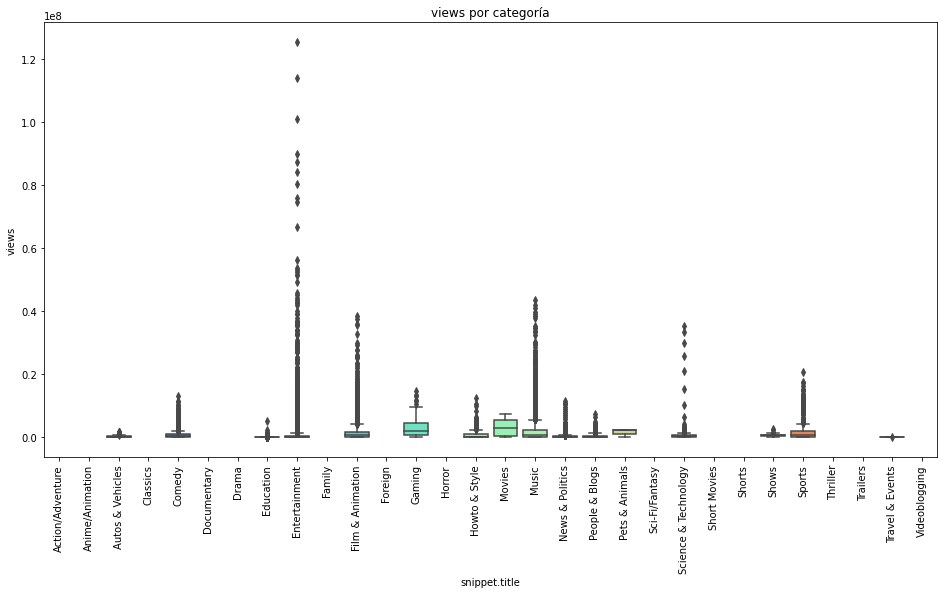

In [46]:
showCatsBy('views')

In [47]:
outliersToMax('Entertainment', 0.6 * 1e8, 'views')

 Cantidad de datos de entretainment: 14766 
 Cantidad de datos outliers: 10


C:\Users\GART-03\AppData\Local\Temp\ipykernel_12484\4212360618.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\GART-03\AppData\Local\Temp\ipykernel_12484\4212360618.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



video_id trending_date  \
3597  6ZfuNTqbHE8    2017-12-02   
3790  6ZfuNTqbHE8    2017-12-03   
3988  6ZfuNTqbHE8    2017-12-04   
4192  6ZfuNTqbHE8    2017-12-05   
4421  6ZfuNTqbHE8    2017-12-06   
4688  6ZfuNTqbHE8    2017-12-07   
4968  FlsCjmMhFmw    2017-12-09   
5163  FlsCjmMhFmw    2017-12-10   
5348  FlsCjmMhFmw    2017-12-11   
5646  FlsCjmMhFmw    2017-12-12   

                                                  title         channel_title  \
3597  Marvel Studios' Avengers: Infinity War Officia...  Marvel Entertainment   
3790  Marvel Studios' Avengers: Infinity War Officia...  Marvel Entertainment   
3988  Marvel Studios' Avengers: Infinity War Officia...  Marvel Entertainment   
4192  Marvel Studios' Avengers: Infinity War Officia...  Marvel Entertainment   
4421  Marvel Studios' Avengers: Infinity War Officia...  Marvel Entertainment   
4688  Marvel Studios' Avengers: Infinity War Officia...  Marvel Entertainment   
4968  YouTube Rewind: The Shape of 2017 | #YouTubeRe...     YouTube Spotlight   
5163  YouTube Rewind: The Shape of 2017 | #YouTubeRe...     YouTube Spotlight   
5348  YouTube Rewind: The Shape of 2017 | #YouTubeRe...     YouTube Spotlight   
5646  YouTube Rewind: The Shape of 2017 | #YouTubeRe...     YouTube Spotlight   

     category_id              publish_time  \
3597          24 2017-11-29 13:26:24+00:00   
3790          24 2017-11-29 13:26:24+00:00   
3988          24 2017-11-29 13:26:24+00:00   
4192          24 2017-11-29 13:26:24+00:00   
4421          24 2017-11-29 13:26:24+00:00   
4688          24 2017-11-29 13:26:24+00:00   
4968          24 2017-12-06 17:58:51+00:00   
5163          24 2017-12-06 17:58:51+00:00   
5348          24 2017-12-06 17:58:51+00:00   
5646          24 2017-12-06 17:58:51+00:00   

                                                   tags      views    likes  \
3597  marvel|"comics"|"comic books"|"nerdy"|"geeky"|...   66637636  2331352   
3790  marvel|"comics"|"comic books"|"nerdy"|"geeky"|...   74789251  2444956   
3988  marvel|"comics"|"comic books"|"nerdy"|"geeky"|...   80360459  2513102   
4192  marvel|"comics"|"comic books"|"nerdy"|"geeky"|...   84281319  2555411   
4421  marvel|"comics"|"comic books"|"nerdy"|"geeky"|...   87449453  2584674   
4688  marvel|"comics"|"comic books"|"nerdy"|"geeky"|...   89930713  2606663   
4968  Rewind|"Rewind 2017"|"youtube rewind 2017"|"#Y...   75969469  2251815   
5163  Rewind|"Rewind 2017"|"youtube rewind 2017"|"#Y...  100911567  2656672   
5348  Rewind|"Rewind 2017"|"youtube rewind 2017"|"#Y...  113876217  2811216   
5646  Rewind|"Rewind 2017"|"youtube rewind 2017"|"#Y...  125432237  2912710   

      dislikes  ...  video_error_or_removed           state        lat  \
3597     41154  ...                   False         Manipur  24.799971   
3790     46172  ...                   False      Chandigarh  30.719997   
3988     49170  ...                   False  Andhra Pradesh  14.750429   
4192     51008  ...                   False     West Bengal  22.580390   
4421     52176  ...                   False        Nagaland  25.666998   
4688     53011  ...                   False        Nagaland  25.666998   
4968   1127805  ...                   False           Bihar  25.785414   
5163   1353650  ...                   False          Kerala   8.900373   
5348   1470387  ...                   False        Nagaland  25.666998   
5646   1545017  ...                   False             Goa  15.491997   

            lon                               geometry                   kind  \
3597  93.950017        POINT (93.95001705 24.79997072)  youtube#videoCategory   
3790  76.780006  POINT (76.78000565000001 30.71999697)  youtube#videoCategory   
3988  78.570026         POINT (78.57002559 14.7504291)  youtube#videoCategory   
4192  88.329947        POINT (88.32994665 22.58039044)  youtube#videoCategory   
4421  94.116570         POINT (94.11657019 25.6669979)  youtube#videoCategory   
4688  94.116570         POINT (94.11657019 25.6669979

De 14766 filas, 10 son outliers de la categoría entretainment.
    Estos serán ajustados al máximo menor a 60000000.0.


C:\Users\GART-03\AppData\Local\Temp\ipykernel_12484\4212360618.py:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\GART-03\AppData\Local\Temp\ipykernel_12484\4212360618.py:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Empty DataFrame
Columns: [video_id, trending_date, title, channel_title, category_id, publish_time, tags, views, likes, dislikes, comment_count, thumbnail_link, comments_disabled, ratings_disabled, video_error_or_removed, state, lat, lon, geometry, kind, etag, snippet.channelId, snippet.title, snippet.assignable]
Index: []

[0 rows x 24 columns]

In [48]:
outliersToMax('Science & Technology', 5*1e6, 'views')

 Cantidad de datos de entretainment: 518 
 Cantidad de datos outliers: 8


C:\Users\GART-03\AppData\Local\Temp\ipykernel_12484\4212360618.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\GART-03\AppData\Local\Temp\ipykernel_12484\4212360618.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



video_id trending_date  \
6136   ot0O9iSxzgQ    2017-12-14   
16359  aBr2kKAHN6M    2018-02-07   
21503  lkfpqGWzHCE    2018-03-09   
21700  lkfpqGWzHCE    2018-03-10   
21903  lkfpqGWzHCE    2018-03-11   
22113  lkfpqGWzHCE    2018-03-12   
22328  lkfpqGWzHCE    2018-03-13   
22505  lkfpqGWzHCE    2018-03-14   

                                                   title channel_title  \
6136                      Dravid spends a #DayWithPixel2  Google India   
16359                              Live Views of Starman        SpaceX   
21503  Searching for Gender Equality — International ...        Google   
21700  Searching for Gender Equality — International ...        Google   
21903  Searching for Gender Equality — International ...        Google   
22113  Searching for Gender Equality — International ...        Google   
22328  Searching for Gender Equality — International ...        Google   
22505  Searching for Gender Equality — International ...        Google   

      category_id              publish_time  \
6136           28 2017-12-12 01:04:51+00:00   
16359          28 2018-02-06 21:38:22+00:00   
21503          28 2018-03-07 16:00:55+00:00   
21700          28 2018-03-07 16:00:55+00:00   
21903          28 2018-03-07 16:00:55+00:00   
22113          28 2018-03-07 16:00:55+00:00   
22328          28 2018-03-07 16:00:55+00:00   
22505          28 2018-03-07 16:00:55+00:00   

                                                    tags     views   likes  \
6136   Rahul dravid|"google"|"pixel 2"|"google pixel ...  10161505   37280   
16359                                             [none]   6401464  165883   
21503  Google Commercial|"Google"|"International Wome...  15316016   37245   
21700  Google Commercial|"Google"|"International Wome...  20974711   42225   
21903  Google Commercial|"Google"|"International Wome...  25778367   43895   
22113  Google Commercial|"Google"|"International Wome...  29810427   44644   
22328  Google Commercial|"Google"|"International Wome...  33541991   45007   
22505  Google Commercial|"Google"|"International Wome...  35276532   45148   

       dislikes  ...  video_error_or_removed              state        lat  \
6136       8009  ...                   False         Chandigarh  30.719997   
16359      2331  ...                   False        West Bengal  22.580390   
21503     30746  ...                   False             Orissa  19.820430   
21700     33419  ...                   False             Punjab  31.519974   
21903     34351  ...                   False  Arunachal Pradesh  27.100399   
22113     35349  ...                   False            Manipur  24.799971   
22328     36086  ...                   False          Jharkhand  23.800393   
22505     36352  ...                   False         Tamil Nadu  12.920386   

             lon                               geometry  \
6136   76.780006  POINT (76.78000565000001 30.71999697)   
16359  88.329947        POINT (88.32994665 22.58039044)   
21503  85.900017        POINT (85.90001746 19.82042971)   
21700  75.980003        POINT (75.98000281 31.51997398)   
21903  93.616601        POINT (93.61660071 27.10039878)   
22113  93.950017        POINT (93.95001705 24.79997072)   
22328  86.419986        POINT (86.41998572 23.80039349)   
22505  79.150042        POINT (79.15004187 12.92038576)   

                        kind  \
6136   youtube#videoCategory   
16359  youtube#videoCategory   
21503  youtube#videoCategory   
21700  youtube#videoCategory   
21903  youtube#videoCategory   
22113  youtube#videoCategory   
22328  youtube#videoCategory   
22505  youtube#videoCategory   

                                                    etag  \
6136   "XI7nbFXulYBIpL0ayR_gDh3eu1k/w5HjcTD82G_XA3xBc...   
16359  "XI7nbFXulYBIpL0ayR_gDh3eu1k/w5HjcTD82G_XA3xBc...   
21503  "XI7nbFXulYBIpL0ayR_gDh3eu1k/w5HjcTD82G_XA3xBc...   
21700  "XI7nbFXulYBIpL0ayR_gDh3eu1k/w5HjcTD82G_XA3xBc...   
21903  "XI7nbFXulYBIpL0ayR_gDh3eu1k/w5HjcTD82G_XA3xBc...   
22113  

De 518 filas, 8 son outliers de la categoría entretainment.
    Estos serán ajustados al máximo menor a 5000000.0.


C:\Users\GART-03\AppData\Local\Temp\ipykernel_12484\4212360618.py:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\GART-03\AppData\Local\Temp\ipykernel_12484\4212360618.py:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Empty DataFrame
Columns: [video_id, trending_date, title, channel_title, category_id, publish_time, tags, views, likes, dislikes, comment_count, thumbnail_link, comments_disabled, ratings_disabled, video_error_or_removed, state, lat, lon, geometry, kind, etag, snippet.channelId, snippet.title, snippet.assignable]
Index: []

[0 rows x 24 columns]

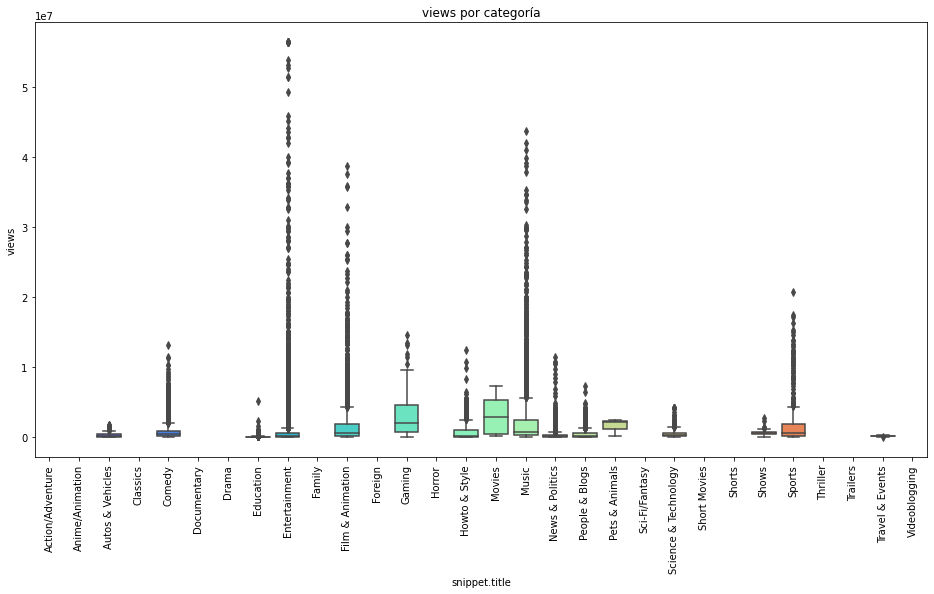

In [49]:
showCatsBy('views')

[Text(0.5, 1.0, 'Tendencia por categoría')]

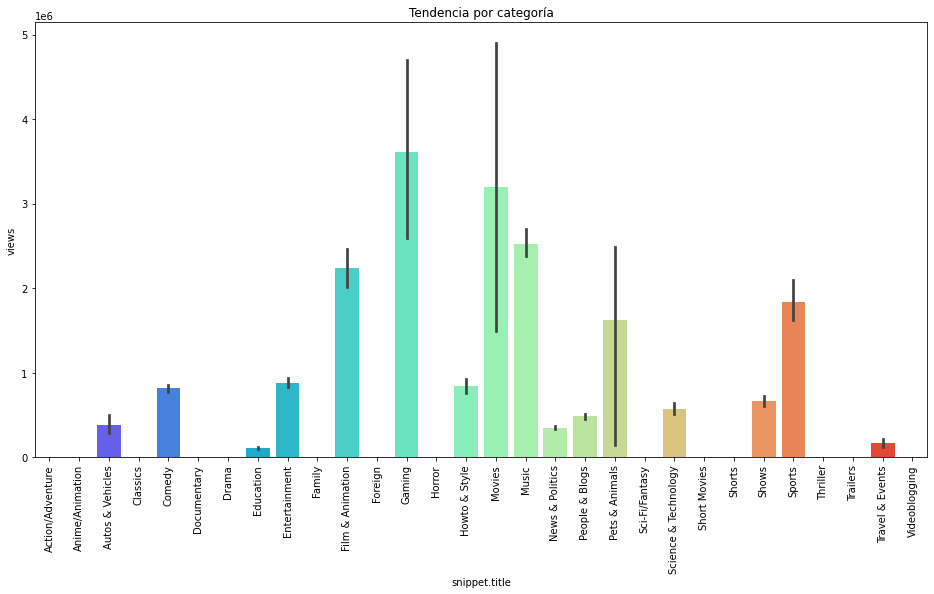

In [50]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
sns.barplot(x="snippet.title", y="views", data=data_cat, palette='rainbow').set(title='Tendencia por categoría')

#### Por el tiempo transcurrido

##### 5. ¿Cómo ha cambiado el volumen de los videos en tendencia a lo largo del tiempo?

En primer lugar, se necesita identificar el rango de fechas del dataset. 

In [71]:
data_cat.sort_values(by="trending_date").head()

video_id trending_date  \
0    kzwfHumJyYc    2017-11-14   
132  zWAjEtFkMgY    2017-11-14   
133  fRY7UWGFvdc    2017-11-14   
134  Dxg-ELOg-L4    2017-11-14   
135  D1z2sKcSsfY    2017-11-14   

                                                 title        channel_title  \
0    Sharry Mann: Cute Munda ( Song Teaser) | Parmi...      Lokdhun Punjabi   
132  Weekly Rasi Phalalu 2017 November 12th - Novem...          muluguastro   
133  ഇടുക്കി ആശുപത്രിയിൽ രോഗികളെ ക്യൂവിൽ നിർത്തിയ ജ...  Malayalam News Time   
134  Nayanthara Visits Kasi Theatre For Aramm Promo...           Cineulagam   
135  ARE YOU FRIENDZONED? ft. SheTroubleMaker | Ris...            Rishhsome   

    category_id              publish_time  \
0             1 2017-11-12 12:20:39+00:00   
132          22 2017-11-11 19:00:03+00:00   
133          22 2017-11-12 11:04:59+00:00   
134          24 2017-11-11 10:42:05+00:00   
135          23 2017-11-11 13:55:16+00:00   

                                                  tags    views  likes  \
0    sharry mann|"sharry mann new song"|"sharry man...  1096327  33966   
132  Telugu Panchangam 2016|"Ugadi Panchangam 2016"...    37384    164   
133                                             [none]   197122      0   
134  Nayanthara Visits Kasi Theatre For Aramm Promo...    94383    168   
135  rishhsome|"vines"|"rishabh rana"|"rishabh"|"fu...   353789  25657   

     dislikes  ...  video_error_or_removed              state        lat  \
0         798  ...                   False  Arunachal Pradesh  27.100399   
132        32  ...                   False  Jammu And Kashmir  34.299959   
133         0  ...                   False  Jammu And Kashmir  34.299959   
134        18  ...                   False   Himachal Pradesh  31.100025   
135      1949  ...                   False         Puducherry  11.934994   

           lon                               geometry                   kind  \
0    93.616601        POINT (93.61660071 27.10039878)  youtube#videoCategory   
132  74.466658        POINT (74.46665849 34.29995933)  youtube#videoCategory   
133  74.466658        POINT (74.46665849 34.29995933)  youtube#videoCategory   
134  77.166597        POINT (77.16659704 31.10002545)  youtube#videoCategory   
135  79.830000  POINT (79.83000036999999 11.93499371)  youtube#videoCategory   

                                                  etag  \
0    "XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKm...   
132  "XI7nbFXulYBIpL0ayR_gDh3eu1k/xId8RX7vRN8rqkbYZ...   
133  "XI7nbFXulYBIpL0ayR_gDh3eu1k/xId8RX7vRN8rqkbYZ...   
134  "XI7nbFXulYBIpL0ayR_gDh3eu1k/UVB9oxX2Bvqa_w_y3...   
135  "XI7nbFXulYBIpL0ayR_gDh3eu1k/G9LHzQmx44rX2S5ya...   

            snippet.channelId     snippet.title snippet.assignable  
0    UCBR8-60-B28hp2BmDPdntcQ  Film & Animation               True  
132  UCBR8-60-B28hp2BmDPdntcQ    People & Blogs               True  
133  UCBR8-60-B28hp2BmDPdntcQ    People & Blogs               True  
134  UCBR8-60-B28hp2BmDPdntcQ     Entertainment               True  
135  UCBR8-60-B28hp2BmDPdntcQ            Comedy               True  

[5 rows x 24 columns]

Como se observa, la tendencia de los videos comienzan el 14 de noviembre del 2017 en el dataset.

In [72]:
data_cat.sort_values(by="trending_date", ascending=False).head()

video_id trending_date  \
38532  wERgpPK44w0    2018-06-14   
38451  0qAexDFUW2U    2018-06-14   
38438  N3aySwVkLdo    2018-06-14   
38439  f4dp5yhdu1g    2018-06-14   
38440  Q5tj5ZmP7mk    2018-06-14   

                                                   title       channel_title  \
38532  Ee Nagaraniki Emaindi Trailer | Tharun Bhascke...  Suresh Productions   
38451  अज्या दाखवणार भय्याला हिसका|Lagira Zhala Jee|1...         NIROM मराठी   
38438  Fun Bucket JUNIORS | Episode 52 | Kids Funny V...           TeluguOne   
38439                  RAMADAN VLOG 4.0 | DUDE SERIOUSLY      Dude Seriously   
38440  Yeh Pyar Nahi To Kya Hai (REPRISE) -Sad Love S...           LoveSHEET   

      category_id              publish_time  \
38532          24 2018-06-10 04:29:54+00:00   
38451          24 2018-06-12 16:32:51+00:00   
38438          23 2018-06-13 13:23:42+00:00   
38439          23 2018-06-13 17:33:48+00:00   
38440          10 2018-06-11 07:46:29+00:00   

                                                    tags    views  likes  \
38532  Ee Nagaraniki Emaindi|"Ee Nagaraniki Emaindi T...  1278249  22466   
38451  lagira zhala jee|"zee marathi"|"nirom marathi"...   100169    312   
38438  fun bucket juniors|"episode 52"|"kids comedy"|...    54441   1050   
38439  dude|"dude seriously"|"gujarati"|"gujju"|"gujj...    44412   2349   
38440  rahul jain|"yeh pyaar nahi toh kya hai"|"yeh p...   351989   7579   

       dislikes  ...  video_error_or_removed              state        lat  \
38532      1609  ...                   False          Rajasthan  26.449999   
38451        46  ...                   False  Arunachal Pradesh  27.100399   
38438        75  ...                   False             Kerala   8.900373   
38439       161  ...                   False           Nagaland  25.666998   
38440       430  ...                   False             Sikkim  27.333330   

             lon                         geometry                   kind  \
38532  74.639981  POINT (74.63998124 26.44999921)  youtube#videoCategory   
38451  93.616601  POINT (93.61660071 27.10039878)  youtube#videoCategory   
38438  76.569993  POINT (76.56999263 8.900372741)  youtube#videoCategory   
38439  94.116570   POINT (94.11657019 25.6669979)  youtube#videoCategory   
38440  88.616647    POINT (88.6166475 27.3333303)  youtube#videoCategory   

                                                    etag  \
38532  "XI7nbFXulYBIpL0ayR_gDh3eu1k/UVB9oxX2Bvqa_w_y3...   
38451  "XI7nbFXulYBIpL0ayR_gDh3eu1k/UVB9oxX2Bvqa_w_y3...   
38438  "XI7nbFXulYBIpL0ayR_gDh3eu1k/G9LHzQmx44rX2S5ya...   
38439  "XI7nbFXulYBIpL0ayR_gDh3eu1k/G9LHzQmx44rX2S5ya...   
38440  "XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxb...   

              snippet.channelId  snippet.title snippet.assignable  
38532  UCBR8-60-B28hp2BmDPdntcQ  Entertainment               True  
38451  UCBR8-60-B28hp2BmDPdntcQ  Entertainment               True  
38438  UCBR8-60-B28hp2BmDPdntcQ         Comedy               True  
38439  UCBR8-60-B28hp2BmDPdntcQ         Comedy               True  
38440  UCBR8-60-B28hp2BmDPdntcQ          Music               True  

[5 rows x 24 columns]

La tendencia de video en el dataset terminan el 14 de junio del 2018. Debido a que el dataset comprende los videos con unos 8 meses de diferencia, se evaluará la tendencia de videos por meses.

In [73]:
tendencia = data_cat["trending_date"]

In [74]:
tendencia

0       2017-11-14
1       2017-11-14
2       2017-11-14
3       2017-11-14
4       2017-11-14
           ...    
38528   2018-06-14
38529   2018-06-14
38530   2018-06-14
38531   2018-06-14
38532   2018-06-14
Name: trending_date, Length: 33106, dtype: datetime64[ns]

In [75]:
tendencia["year"] = tendencia["trending_date"].dt.year

KeyError: 'trending_date'

##  Visualizar los Datos